In [3]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import math
from ipywidgets import interact_manual
import ipywidgets as wdg
from colorama import Fore
from colorama import Style

def weighted_average(elements):
    w_avg = 0
    distance_list = []
    for i in range(len(elements)-1):
        for j in range(i+1,len(elements),1):
            distance_list.append(math.sqrt(((elements[i][0] - elements[j][0])**2)+((elements[i][1] - elements[j][1])**2)))
    if(len(distance_list) == 1):
        w_avg = distance_list[0]
    else:
        for k in distance_list:
            w_avg += k*k/sum(distance_list)
    return w_avg

def average(elements):
    suma = 0
    if(len(elements) == 2):
        suma = math.sqrt(((elements[0][0] - elements [1][0])**2) + ((elements[0][1] - elements[1][1])**2))
        return suma
    else:
        for i in range(len(elements)-1):
            for j in range(i+1,len(elements),1):
                suma += math.sqrt(((elements[i][0] - elements[j][0])**2)+((elements[i][1] - elements[j][1])**2))
        return suma/len(elements)

def change_centroids(elements):
    x = 0
    y = 0
    for point in elements:
        x += point[0]
        y += point[1]
    return [x/len(elements),y/len(elements)]
    
def get_data(n,seed,x_min,x_max,y_min,y_max):
    data = []
    rd.seed(seed)
    for i in range(n):
        x = rd.uniform(x_min,x_max)
        y = rd.uniform(y_min,y_max)
        data.append([x,y])
    return data

def set_centroids_improved(data,k):
    centroids = []
    centroids_to_check = []
    distance = []
    for i in range(len(data)):
        centroid = []
        while(len(centroid)<k):
            c = rd.choice(data)
            if(c not in centroid):
                centroid.append(c)
            if(centroid in centroids):
                centroid = []
        centroids_to_check.append(centroid)
    for j in centroids_to_check:
        w_avg = weighted_average(j)
        avg = average(j)
        distance.append(abs(w_avg-avg))
    index = distance.index(np.max(distance))
    centroids = centroids_to_check[index]
    return centroids
    
def k_means_improved(data,k,maxiter):
    centroids = set_centroids_improved(data,k)
    clusters = []
    for i in range(k):
        clusters.append([centroids[i]])
    iteration = 0
    while (iteration <= maxiter):
        no_changes = 0
        for point in data:
            distance = []
            for centroid in centroids:
                distance.append(math.sqrt(((point[0]-centroid[0])**2)+((point[1]-centroid[1]))**2))
            index = distance.index(min(distance))
            for x in range(len(clusters)):
                if(point in clusters[x] and index != clusters.index(clusters[x])):
                    clusters[x].remove(point)
                elif(point not in clusters[x] and index == clusters.index(clusters[x])):
                    clusters[x].append(point)
                elif(point in clusters[x] and index == clusters.index(clusters[x])):
                    no_changes += 1
            for j in range(k):
                centroids[j] = change_centroids(clusters[j])
        iteration += 1
        if(no_changes == len(data)):
            break
    return clusters, iteration

def set_centroids(data,k):
    centroids = []
    while(len(centroids) < k):
        c = rd.choice(data)
        if(c not in centroids):
            centroids.append(c)
    return centroids

def k_means(data,k,maxiter):
    centroids = set_centroids(data,k)
    clusters = []
    for i in range(k):
        clusters.append([centroids[i]]) 
    iteration = 0
    while(iteration <= maxiter):
        no_changes = 0
        for point in data:
            distance = []
            for centroid in centroids:
                distance.append(math.sqrt(((point[0]-centroid[0])**2)+((point[1]-centroid[1]))**2))
            index = distance.index(min(distance))
            for x in range(len(clusters)):
                if(point in clusters[x] and index != clusters.index(clusters[x])):
                    clusters[x].remove(point)
                elif(point not in clusters[x] and index == clusters.index(clusters[x])):
                    clusters[x].append(point)
                elif(point in clusters[x] and index == clusters.index(clusters[x])):
                    no_changes += 1
            for j in range(k):
                centroids[j] = change_centroids(clusters[j])
        iteration += 1
        if(no_changes == len(data)):
            break
    return clusters, iteration

In [4]:
print(Fore.BLUE + Style.BRIGHT + "Type data below and click button:")
@interact_manual(n=wdg.Text(value='', description='N:', placeholder='Type here', disabled=False),
seed=wdg.Text(value='', description='Seed:', placeholder='Type here', disabled=False),
x_min=wdg.Text(value='', description='Xmin:', placeholder='Type here', disabled=False),
x_max=wdg.Text(value='', description='Xmax:', placeholder='Type here', disabled=False),
y_min=wdg.Text(value='', description='Ymin:', placeholder='Type here', disabled=False),
y_max=wdg.Text(value='', description='Ymax:', placeholder='Type here', disabled=False),
k=wdg.Text(value='', description='K:', placeholder='Type here', disabled=False),
maxiter=wdg.Text(value='', description='Max iteration', placeholder='Type here', disabled=False))

def function(n,seed,x_min,x_max,y_min,y_max,k,maxiter):
    data = get_data(int(n),int(seed),int(x_min),int(x_max),int(y_min),int(y_max))
    results = k_means(data,int(k),int(maxiter))
    clusters = results[0]
    iterations = results[1]
    print('Iterations:' + str(iterations))
    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot()
    for i in range(len(clusters)):
        print("Cluster " + str(i+1) + ": " + str(len(clusters[i])))
        x_values = []
        y_values = []
        for j in range(len(clusters[i])):
            x_values.append(clusters[i][j][0])
            y_values.append(clusters[i][j][1])
        ax.scatter(x_values,y_values)
        ax.scatter(sum(x_values)/len(clusters[i]),sum(y_values)/len(clusters[i]), color = 'black', edgecolor = 'black', s=60)
    plt.title("K-means algoritm clustering", fontsize=16)

Type data below and click button:


interactive(children=(Text(value='', description='N:', placeholder='Type here'), Text(value='', description='S…

In [5]:
def data_generator(x_min,x_max,y_min,y_max,n_in_cluster,noise,k):
    centroids = []
    distances = []
    data = []
    for c in range(k):
        x = rd.uniform((x_min)+(x_max/k)*c,(x_max/k)*(c+1))
        y = rd.uniform(y_min,y_max)
        centroids.append([x,y])
    for i in range(k):
        distance = []
        for j in range(k):
            if(i != j):
                distance.append(math.sqrt(((centroids[i][0] - centroids[j][0])**2)+((centroids[i][1] - centroids[j][1])**2)))
        distances.append(distance)
    for m in range(k):
        while((m+1)*n_in_cluster >= len(data)):
            if(m < k):
                xp = rd.uniform(x_min,x_max)
                yp = rd.uniform(y_min,y_max)
                if(math.sqrt(((centroids[m][0] - xp)**2)+((centroids[m][1] - yp)**2)) < np.min(distances[m])/2):
                    data.append([xp,yp])
    for o in range(noise):
        x_p = rd.uniform(x_min,x_max)
        y_p = rd.uniform(y_min,y_max)
        data.append([x_p,y_p])
    return data

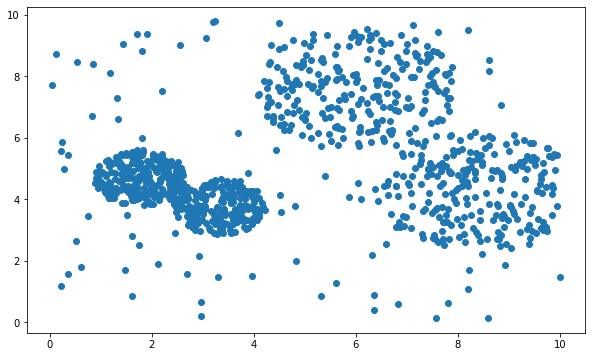

In [6]:
dane = data_generator(0,10,0,10,225,100,4)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
x_values = []
y_values = []
for i in range(len(dane)):
    x_values.append(dane[i][0])
    y_values.append(dane[i][1])
ax.scatter(x_values,y_values)

In [7]:
def check_algorithms_efficiency(x_min,x_max,y_min,y_max,n_in_cluster,noise,k,attempts):
    improved = 0
    casual = 0
    improved_iterations_match = 0
    casual_iterations_match = 0
    improved_iterations = 0
    casual_iterations = 0
    for x in range(attempts):
        data = symetrical_3
        results_improved = k_means_improved(data,k,100)
        clusters_improved = results_improved[0]
        iterations_improved = results_improved[1]
        counter_improved = 0
        improved_iterations += iterations_improved

        results = k_means(data,k,100)
        clusters = results[0]
        iterations = results[1]
        counter = 0
        casual_iterations += iterations

        for i in range(k):
            if(len(clusters_improved[i]) >= n_in_cluster):
                counter_improved += 1
            if(len(clusters[i]) >= n_in_cluster):
                counter += 1
        if(counter_improved == k):
            improved += 1
            improved_iterations_match += iterations_improved
        if(counter == k):
            casual += 1
            casual_iterations_match += iterations
    print('Efficiency of improved algorithm: ' + str(improved/attempts) + '   ' + str(improved_iterations_match/attempts) + '   ' + str(improved_iterations/attempts))
    print('Efficiency of classical algorithm: ' + str(casual/attempts) + '   ' + str(casual_iterations_match/attempts) + '   ' + str(casual_iterations/attempts))

In [8]:
no_symetrical_3 = [[1.1298156968381823, 8.69974447664346], [1.1687894437389423, 8.287680943308382], [0.6359585977453064, 8.20541183824775], [1.4847627516276274, 7.896083721168525], [0.3186379605563805, 9.456700709392852], [1.4244317533349848, 9.202261355870421], [1.5280435791853197, 8.049149474192953], [0.7456892009845906, 9.957029351116976], [0.27059858070265896, 7.63984430876957], [0.30238986049978767, 9.66395607105434], [2.158429537253509, 8.8160086435361], [1.7009520952839285, 8.090630595404528], [1.630320025606381, 9.534257319713149], [0.7388255473998895, 8.956138620435938], [0.18159422080124332, 7.704101300218298], [1.2223174737375797, 7.823929216275354], [1.4863302628662045, 8.674987263690515], [1.396791011848959, 8.965259092474035], [0.3449050857015523, 7.716228684444346], [0.008812820284630485, 8.02478465774644], [2.462614353772117, 9.718342404764353], [1.5451923941097212, 7.963417082527574], [2.015026402523048, 9.304710091849318], [0.8522972894919456, 8.679065241491855], [0.09228526324184694, 9.675138574308127], [0.4235845209628719, 8.299927007495056], [2.184210283437328, 8.664016828153366], [1.0554161809510754, 9.912076599924491], [0.20455277934607885, 8.892839230157865], [0.2741780272206762, 8.139623937220941], [0.2916278602885092, 7.912879401055001], [0.5137537870688602, 9.331138759068608], [0.5669516492051019, 8.34450784733644], [2.5277878731249626, 9.83675420606241], [1.743682375290121, 9.947546697952204], [2.0352282187773527, 8.837993351669311], [0.24640259420198762, 8.580245849407582], [0.9388761021092662, 9.384495584112928], [1.4599744178495588, 9.616917023444321], [2.545457543848996, 9.828532141704216], [1.744700097489501, 9.027631100002244], [0.049324289647284525, 8.758977160836196], [0.5551645934724103, 8.25992194153574], [0.6310908215337718, 8.685278757593846], [1.9416797154552523, 8.92398395605719], [0.7203176741767359, 7.8338831646512865], [1.6043877881674762, 7.9806156672852495], [0.9236502049094264, 8.887354203584309], [0.7099260683737385, 9.815995161719417], [2.233133870131243, 9.979843970966149], [1.583588774782213, 8.190844605985331], [1.8200936906374643, 9.964692669385364], [2.0568787402098265, 9.060545691166817], [1.9974166560826123, 8.548714204647203], [0.022907116974758557, 8.013361902539307], [1.0509934078766148, 9.421778012132435], [1.1331647471726947, 9.215283074065585], [1.1468109560133133, 8.930604107397368], [2.340008502076061, 9.139405852048988], [0.17211921326580337, 7.949658348924741], [1.4711400085501891, 8.49245729129946], [1.599543806023328, 8.975781036888232], [2.036620845140642, 9.352487147262794], [1.7437486131229885, 9.966021821403693], [1.5066045238301962, 8.141603879915607], [1.820127650150809, 9.538257890537654], [0.6755725437447746, 8.471420837681961], [1.0943248475521816, 9.272351943694511], [0.17471438026078312, 7.875017233901044], [1.0638384809526413, 9.399269359388484], [0.9870855111757149, 8.686010010851069], [0.6944493032399846, 8.641668956405109], [0.49140148066020406, 9.59892061529578], [0.9915106059043122, 9.470935923731961], [0.07508945034411685, 8.649295316977888], [1.9988126855244759, 9.439750810559685], [0.3922685460931652, 8.50363362763347], [0.9310733463032894, 9.816192377180927], [1.5812847601880353, 8.361192189149113], [0.7089525619711179, 7.736674938408198], [1.4090849940609784, 8.249129876342753], [1.7928724998179624, 9.309584119077467], [2.3800945481997795, 8.932541228350356], [2.150174302724679, 9.835803506187075], [1.598788186917094, 8.380928567396785], [2.406088852381129, 9.220000098235007], [0.09442468412816041, 7.944960504755617], [1.4178209115842844, 8.205572407198856], [2.0028210225293064, 8.624128153487705], [1.5209825321685067, 8.345543985270274], [1.391388724947854, 8.788526148882106], [0.5057788513341255, 8.40454471902624], [1.1970299880738255, 8.797220798676694], [2.4088138119866698, 8.943116998424253], [0.5234234711650421, 7.956633369449696], [1.299764819286784, 9.044801333588559], [1.896007929213126, 8.393682975877782], [0.6137317545213605, 8.337295297442166], [1.059424777327902, 8.796009352217958], [0.23232797275897554, 8.701164978686633], [1.2350161986154418, 9.435073506885935], [0.5582110394001338, 8.945068944100104], [2.405081756287201, 8.86248630581603], [1.4936704239313636, 8.822951092735304], [0.4552377981055422, 8.382546206144207], [0.2696444570678358, 9.835391563326581], [1.7666518980590162, 9.147353317658588], [1.8212758070524637, 9.605387581460104], [1.2796027156403755, 8.951424352025347], [1.2065963587336537, 9.911656886045932], [0.7241419481076106, 8.35923673132615], [0.245832838510891, 8.698212431313529], [2.462443874967212, 9.358621434196309], [0.006297484571928802, 9.743897375858838], [1.1052969348327035, 9.563113102130513], [0.658142536376729, 7.640512449305591], [1.2571902362689136, 9.798688473800132], [0.6025950748141573, 9.8212459142823], [1.5938960221409848, 8.186210526629681], [1.5309586539146303, 8.670199066251511], [0.6356024977008046, 7.783796159761929], [1.81052520911405, 9.56384504818316], [0.42273174400055624, 9.678938462720076], [0.8771493047734302, 9.238033175838611], [1.9903915723481813, 8.320547294218546], [0.23461839511328741, 9.631896968572553], [1.5277399631144717, 8.648299748764734], [2.436688471934998, 9.817034961016995], [0.5129678707550533, 7.934266671369913], [1.587493569665006, 8.474774385576415], [1.0547908368596837, 7.945285724477139], [2.4093359773259526, 9.410897203960213], [0.4491252105769905, 9.630485246414898], [0.8536201357048756, 8.7561975799251], [1.77609779475285, 9.642888342400823], [1.1442305709807032, 8.644446618483023], [0.019741717441942308, 9.163121078710649], [1.0218141329161257, 9.683194393381278], [1.3530899533423946, 9.880596797612903], [0.7591797765403974, 9.135345981490499], [1.4664528073666228, 8.962379789129738], [2.5395718089267105, 9.88660559285947], [0.674447379134554, 7.647296424860035], [1.5776656396966293, 9.13777209513295], [2.2462483138825218, 8.95250388558365], [1.678853237340413, 8.033819739368354], [0.4967664045957887, 8.37199103679163], [2.4550540746825056, 8.99637232894216], [0.22613449065030156, 9.09832066694411], [0.3478639060530908, 8.991252786709058], [1.544488087374356, 9.14187833950783], [0.046619478723846086, 9.673195960746078], [0.11254752259019174, 9.30951626739209], [0.48948900454053756, 8.029295786441585], [1.4006930151462116, 8.81731888231127], [0.4456781785495456, 9.13809583169335], [1.8148168297538136, 8.347702057711317], [0.20913537951674166, 9.185433969772745], [0.0402925817271671, 8.706538273322296], [1.0723545882090302, 8.013066739655503], [0.363371843673701, 9.783993852962064], [1.4300289690382284, 8.423998183714428], [1.6623113511445564, 8.073178652816916], [0.09739534814526496, 9.52343293427212], [1.9528487103146863, 8.631892037784382], [1.0345840817996854, 7.977847872710287], [2.140476731908565, 8.768476704897662], [1.1613972273969597, 9.79338252238686], [1.9134021094853904, 9.302404272753702], [0.14645982507528799, 8.903964050037454], [0.8145887760534043, 9.909043583088694], [0.42215350200309865, 7.727200747886354], [0.7876499948234139, 8.632492272407141], [1.8314409277643617, 8.666706883456113], [0.44606129560948227, 8.992787011578768], [0.19679096715270683, 9.235190541175257], [1.0377688148298025, 9.309523558485749], [0.6135849271558891, 9.923258918649719], [0.842179372394618, 9.642455018582686], [0.16114444333811706, 9.450195791367832], [1.7724895151307263, 8.180090449794244], [2.228017184566623, 8.691294806375703], [0.41218263700257607, 7.625084988667235], [1.8270866462036472, 9.056491506228637], [0.11542028449762598, 8.640749198176456], [1.0579309658636782, 9.222381944831689], [2.506801774733752, 9.74136048745454], [0.7990332723292448, 9.3321832035717], [0.6758760196883595, 8.90022338206466], [0.9329782620263649, 9.157388223952122], [0.23938364500211584, 8.88179802084337], [2.379750744257827, 9.352227260275246], [2.2839535195260616, 9.399622884734244], [1.1363843308987143, 8.078550118668735], [1.1554671474416411, 8.517330674302409], [0.7758600491481327, 8.542277644998421], [0.5686926804865655, 9.08888022827704], [0.3188630036295925, 8.455039428206575], [2.490853258772524, 9.100009195602954], [0.992408188815338, 8.168865583493782], [1.2400973613237365, 8.029769722090935], [1.927161036134013, 9.936351267034183], [0.407877914095488, 8.487921173778567], [0.9475323600058772, 7.723263289079343], [2.2489433890405874, 8.857821927621869], [0.8801171279853914, 9.659935645999791], [1.6835426942864473, 8.46628838116186], [0.8382129777529324, 8.744212152310308], [2.189908289218492, 9.728127372716086], [1.809141343463303, 8.933640420000367], [2.0085699783328836, 9.009429490101917], [2.34551226975762, 9.093566166253844], [0.32357106015898585, 9.290124272539442], [0.9145162124579698, 8.158277194444425], [0.5234657246220675, 9.172141825065117], [2.4258100372812286, 8.886438714107905], [1.2818592693301123, 9.832776040347635], [2.1308744032077396, 8.686039882905606], [1.9966164004154718, 9.054216514295769], [0.4052720230301554, 7.717705042771], [2.0659571238113648, 9.269856061344075], [0.8210153274752141, 7.71371255825421], [1.5153054249685827, 8.277232494528375], [0.09818108860918606, 9.158025901893826], [1.2268120702085217, 9.836600973454692], [2.1583945391043846, 9.761132350086871], [1.210497949286875, 9.806076777197704], [1.6595716611124467, 9.473795915995442], [0.15028908815443942, 9.558551785265339], [0.6185842667308028, 9.05693956390574], [1.2126373177666427, 9.511931816823973], [1.6204217052595848, 8.508688419557375], [1.3445158346362907, 8.667162585222435], [0.7299645221563766, 9.910852279139345], [0.40230635718173646, 8.117522334889639], [0.584573887931541, 8.672108874167222], [0.3318080925399225, 7.684979803067823], [1.145715941826313, 9.527057554126241], [2.0692745921008893, 9.873895873380018], [0.33965656249516085, 7.784044078250049], [2.168019176680873, 8.990508282564937], [0.9511028275844857, 8.653226981431633], [1.4428015779053605, 8.1218028153883], [1.3407750644262395, 8.121262676776844], [1.6927862770165913, 9.4031040452591], [0.18123454378970894, 9.592271338472534], [1.0799891350730817, 9.731274727861353], [1.2743078136459496, 9.020510582478384], [1.77143316706048, 9.364510414322046], [1.135398428133677, 8.124789511065305], [0.7846348499103162, 9.659635081346515], [1.632335808468871, 8.458563524855714], [0.5432982130133202, 9.670959810931645], [1.2332035799862973, 9.894711702382429], [2.1148293080730407, 9.959882026331437], [0.6742186096269198, 7.929103950765597], [0.047489241673284166, 8.377984341484138], [0.6526983496495542, 9.99125233523235], [0.6814780965360345, 7.831340264157243], [0.11194196609955465, 8.076972175822547], [0.23457979008384533, 8.489218631780469], [2.035752512450497, 9.797333827265073], [0.06010629692146274, 9.26558146998625], [0.3790353893849363, 8.64213912363075], [0.4338717223539057, 9.655204204356906], [1.9672333591670488, 9.85026716082768], [1.3415287410133558, 8.160400026661838], [1.6693288043041532, 8.200124250801196], [1.029417654139969, 9.579763322722576], [0.7839528857476441, 8.484998585990159], [2.1995115073905422, 9.16930680649984], [1.7521289157409536, 8.902714218931768], [0.29958764287442263, 9.241368163191423], [0.025559250137244804, 8.05039184329026], [0.12018464902924686, 9.722981228492689], [0.8265905496908921, 9.924248750828724], [0.21470588974043747, 9.170508295184796], [1.6114220587902628, 9.805472352237084], [1.2909433454291397, 8.764502199352378], [1.1420110769404845, 9.27518933038259], [2.0053630577104187, 8.986417566835975], [0.2929723216819591, 8.12688752731725], [2.001665681526749, 9.364926946315473], [1.4102137247032631, 9.426810294174292], [0.07879693852877012, 8.207230194089979], [0.7286907963370037, 8.478937806771734], [0.44804016027804816, 8.905509411709625], [2.061186909557083, 8.931884986597748], [0.1667345959290334, 9.159470342506475], [0.43101272122255674, 9.015182068951567], [0.2223639041622716, 9.10904197488156], [2.0286737524068, 8.540559100821364], [0.3840013605598036, 8.372618296965605], [1.0519711870217885, 8.751832422871345], [0.14935074955924943, 8.939465080385014], [0.04860896937381676, 8.545143144091622], [1.6882785803529043, 9.891417454916214], [2.0799156999198, 8.606475231327293], [0.6956386776126755, 7.7011921517851984], [0.9649805383646382, 9.587385254340607], [1.0984339169703494, 7.74271917642891], [5.099131871098628, 8.672190309379719], [4.803964352590446, 7.798186601885318], [2.7926287468804722, 9.76985172786839], [6.599309375898107, 9.076462578178637], [6.304369736240573, 9.290803245466254], [4.015981285920812, 8.101665075093846], [3.5998781786327374, 8.264042225569025], [5.031282676028481, 9.346944569163119], [5.346121529640665, 9.145527825238052], [6.18503490711071, 9.921148306996537], [5.975669517035675, 9.891031169544792], [3.893348974042695, 8.735997664777486], [3.087889779785551, 9.112565507815383], [3.9298302311023137, 9.485703070828363], [5.7008782782331116, 9.212441489920874], [5.6441135239929565, 8.711321267299287], [4.053862098028409, 7.940891814276448], [5.7624526568607335, 8.004220350816347], [6.606720102647222, 9.506794135727096], [3.1140252019221624, 9.484606601452986], [4.208796550182665, 8.84936985088803], [5.421442192419254, 8.681815082469303], [6.091923949401384, 9.28529232624095], [5.541259244187026, 9.449510946244175], [4.647779951922619, 7.845618581392212], [4.256408813757403, 8.464056458753552], [4.314489317398676, 9.277824551621496], [4.675530923611955, 8.379367569762973], [3.485876914508601, 9.065661044150366], [4.678195008527054, 8.459205908111885], [4.506047516037738, 8.542073198760342], [6.596194158606109, 9.843547136518154], [4.45689554189517, 8.101400050258643], [2.6372563050009923, 9.606867404175524], [4.237462365451537, 9.068731188316868], [6.663697559263938, 9.368527882255819], [5.483457612953506, 8.69515598888259], [3.7651005399726243, 9.613952131468404], [3.599854806731858, 8.775293057155595], [5.12819750897598, 7.999035336674033], [6.507858496496448, 9.831594757840826], [3.5654602289598722, 9.33926435801879], [5.4038059139894825, 9.89797786277429], [4.27897956000858, 8.394865343758841], [5.525435625059915, 8.76517290260532], [4.783988993843145, 9.451969358462375], [4.162427645611944, 8.311205843668048], [5.400826133885131, 8.674009891083905], [5.119537183480656, 9.158642512501803], [6.267503506956001, 8.361607426026557], [6.461061368635571, 9.911167006752338], [5.593631305983088, 8.369814530889997], [4.072232620987091, 8.478973696566758], [4.086625584250667, 8.404585644603927], [5.068496146428286, 8.526766222935478], [4.957768235788226, 9.119222011373836], [4.162766240801097, 8.65996582814801], [5.564817659481063, 8.106142113551154], [3.6158720374534434, 8.843223706644995], [5.931952030075125, 8.446184098041241], [6.193211632979252, 9.332207657840772], [3.1711633190299047, 9.914990476266748], [3.2538678867744464, 8.490357587508718], [4.299540428551665, 8.37589383956204], [4.546146517639627, 7.870060564904645], [5.695207769644382, 9.857370224366722], [4.016908221177399, 8.152882144851594], [5.769226072255064, 8.019972020516432], [5.351130010993732, 9.115715596872532], [4.740308982245502, 8.155608713625993], [4.821333501395135, 9.666197464936756], [4.780061559701219, 9.788524079822073], [5.19236274667588, 9.751442068530705], [3.2333864185063312, 9.490458840693432], [5.849872393496005, 9.98150170330336], [2.8350564068181825, 9.36432292979026], [4.5740490593063745, 8.888388547107995], [2.713306699190273, 9.350609259423184], [5.612609100045919, 9.246327491447934], [6.055000500771519, 8.977260821392008], [5.524599229371022, 9.530216892154463], [3.951260216661825, 8.421816765521111], [5.444953604294441, 8.3199916686491], [4.761088806562729, 8.216118646185805], [3.073700689104811, 9.62093454534202], [3.444627690467027, 9.344902928206517], [5.709728119169179, 9.556014799314216], [4.996247646960645, 9.851124840785282], [5.2598762479809125, 8.35908297935568], [4.210082580694824, 9.557425115603477], [6.183277467852204, 8.240077982248131], [6.393177771579336, 9.485514768310498], [5.848171849265741, 8.851693533949643], [5.280671130331025, 8.11575409806037], [6.159311978746274, 9.311933511548293], [4.150843377761917, 9.909091297385263], [4.57986876329344, 8.263959059261522], [4.191557958354229, 9.946874235727517], [2.893829478801737, 9.802740319458964], [2.778347813795027, 9.685143998336304], [5.493887726192312, 8.936755931404244], [5.0964048364779755, 9.610579404816761], [5.982740880515803, 8.232124711266822], [5.24028821425241, 9.216959292643592], [6.25016435261678, 8.826890954712601], [3.933887276300445, 7.916130769787733], [4.369028996048797, 9.580414866920158], [5.48189460157494, 8.229216378402448], [2.9295980509234965, 9.714798566894665], [4.34497753730374, 8.747194667621875], [4.747073667958586, 9.345685630172856], [3.394126022467363, 9.504251321916213], [4.9537283684541045, 8.772308017019492], [4.871267369058881, 8.973245289479218], [4.9695884404400275, 9.538538265415742], [5.441381848457663, 8.916305534437775], [3.667457563331605, 8.368263820678877], [4.3133187386292136, 9.776269110282957], [6.5346244152345525, 8.96432303147838], [2.9157425366637755, 9.422019073494742], [4.778464736042015, 9.985948740819099], [3.281938426908341, 9.092050952852139], [4.641709265435652, 9.25740431550919], [4.978860196101667, 9.584636014938146], [4.921411770571451, 8.167760285806551], [6.068379339564533, 9.919051498529445], [3.312262619099485, 9.422279416434113], [3.5479395601533303, 9.799985551773615], [3.2321014619581065, 8.857847571505726], [5.9942181779570305, 8.412903039739216], [3.4968710985690246, 9.45077286950094], [5.336841900032718, 7.939352132535818], [5.752865621968123, 9.410489489253301], [4.385723273895099, 8.017504575908866], [5.026126411684481, 8.306500053605694], [5.634142576377363, 9.717145398572214], [4.4630320581178875, 8.278818758058977], [3.011985523586591, 9.291697067432182], [6.824516231971413, 9.252997672238102], [5.1084474060924006, 8.66959236030201], [3.617798734346993, 9.49712158220296], [5.358533377566326, 9.022620921352434], [5.0665517676864145, 8.596877921773636], [4.176001661330381, 9.214775208002017], [3.75731910424979, 9.303605074862261], [3.4123823556544464, 8.705413710611426], [6.117160386526108, 8.453849350597045], [5.352080312660648, 8.85972050450944], [6.2176959590973215, 8.922205274197047], [4.418620182574827, 9.788425781570531], [3.241712835564061, 9.513331655516446], [3.779365712830023, 8.850825482484419], [5.73130761773602, 9.146646057341707], [3.9446498306834386, 9.363863240716908], [5.538102964463773, 8.280698708274613], [5.490632923481335, 8.719815714841467], [6.18684038657441, 8.755115408448763], [4.121742290219386, 8.253849593410653], [4.811570191252844, 9.420329111625197], [5.327324799328288, 7.907303294249559], [5.233911553672941, 9.872182588412699], [5.647845809021263, 8.089548300241749], [5.401152605448642, 8.146009673237403], [3.9322050564254263, 9.989019086564157], [6.219529702087549, 8.955345391323581], [6.066385237963554, 8.856285519363432], [2.828341893200127, 9.18458795556057], [5.262417707026012, 7.809930546968418], [3.718977536106437, 9.493119148701835], [5.964085737972616, 9.556229550163529], [5.934834158810771, 9.421958943883892], [5.540586638155556, 8.987858525684588], [5.57535387907306, 9.81070857374133], [4.089665025558956, 8.505034041757137], [5.743189841011777, 8.058340304597246], [4.259305629124196, 9.547654910534378], [4.344633280305573, 9.216126499115662], [3.8018224810211887, 9.82982947458337], [3.480345110647912, 9.085761066658206], [2.664722028852615, 9.455290816927693], [4.501943372005148, 9.396643047773566], [5.2600153951690665, 9.404530858589167], [6.3429146440592135, 9.940416035615867], [3.8897118172277443, 8.873531121446698], [5.813386398191579, 9.322953037879797], [5.603018738009532, 9.728020661262782], [3.3706754831647032, 9.345775058864488], [3.2893225622358613, 9.789672236814134], [5.3503953747857524, 7.9394699356855245], [5.654946091569397, 9.213999926082977], [3.177653420425962, 9.60344488519751], [5.693582698172198, 9.702106874341926], [4.8309188231666695, 8.014605386492345], [3.3082873249617273, 8.921142977022123], [3.5412619671231504, 9.009137074475083], [2.957991499972843, 9.891198610460076], [4.65008054779741, 7.942674691882161], [2.644981787980959, 9.61004141745597], [5.852855013951995, 8.403359027714103], [4.293300711260355, 9.833646952843324], [6.345975639146508, 8.877343824895354], [3.7921326279866263, 8.185124316901017], [4.064046184406686, 9.353404606480566], [6.356044721095784, 9.015780627517195], [4.989407017954132, 8.971903989693788], [4.212725230885122, 9.55284541612357], [5.794512474073655, 9.561010874871208], [5.204103345774794, 9.55920550968051], [3.9093062303805173, 8.395139375719134], [3.5603310018484002, 9.60756028006428], [4.158980842084344, 8.96742643769339], [4.656012249467897, 8.073930395956356], [5.323871970109632, 7.87616417689509], [3.958147871616924, 9.947750263376719], [5.7531436244302645, 9.519377996568885], [2.7333843444585026, 9.495437520926313], [3.558452934352596, 9.897555459871137], [3.848544766857839, 8.739968776490553], [3.7183516533920002, 9.548593530241883], [4.131427563497436, 9.930231971381836], [3.962224907248586, 9.596060379721452], [6.337751195409029, 8.898743329671495], [4.064972669735198, 8.709296339830962], [3.7255035058559915, 9.365798214514285], [6.481202175682364, 9.273655489642971], [3.960920039272188, 9.852783924909772], [5.470568352365927, 9.108245619309267], [4.812742374068838, 9.319731426158924], [5.594990982548889, 9.302774481463711], [5.172022326813134, 8.79887513395063], [3.673936469562078, 9.161497162477799], [5.14782975077968, 8.976552803584756], [4.432034347228052, 9.927860952721089], [3.80748506908834, 8.040730605543748], [4.592402268613426, 8.978805873730733], [4.09507537910318, 9.674189442069586], [3.9515292684609693, 8.124761715978572], [4.827291206340223, 7.799724261602952], [4.65504743594941, 9.639790157697858], [5.5146773534167925, 8.165029054062666], [4.445247686647172, 8.278735093667333], [4.806165913353563, 7.882146407345115], [3.905394308480714, 8.835437968670059], [6.490821591266842, 9.56517782841921], [3.8960455669349447, 8.51679615901987], [5.648220560647703, 9.369401823753506], [5.294155176500927, 7.838348344818275], [5.15805764245349, 8.195393828222699], [6.166175672276838, 9.17272823212005], [3.6408839763491874, 9.47805441080968], [3.0145504384837984, 9.456574701756411], [3.1211943682597045, 8.835013028231169], [5.851792899561237, 8.485229924595906], [3.9971235531860305, 9.55516662199027], [4.520855519799813, 8.026437299038179], [6.5410274614210255, 9.08602915289362], [3.7274809634318906, 9.235476808622522], [5.554641359494612, 8.73001436675985], [5.344666633976908, 7.847554868632637], [5.51203023952625, 8.755743985393636], [3.3263418637444984, 9.044126537182601], [6.051349100601916, 9.02602421349931], [5.251499311490217, 8.007200693483512], [6.421645822059466, 9.612705274820872], [6.353109610121007, 9.457940144895092], [3.8766408325278467, 9.245712757893552], [3.390996732260654, 9.501202901386549], [5.181785004001551, 9.822377998336876], [6.837187372439083, 9.976717007877763], [5.178233167103516, 9.971913575319572], [3.548720980975788, 8.821887153609708], [5.28774928365897, 8.170867878963607], [3.474372756518529, 9.341853307326232], [3.983212809317936, 7.8981864351391], [5.796255957426574, 9.71962138106978], [5.518428931481866, 9.512390692907134], [3.996534393650789, 7.985954785160041], [3.4405442684832, 8.36533529581874], [3.5129892950555175, 8.171494550085276], [6.351200712358401, 9.94088461334956], [4.221289020941169, 8.758364450584855], [4.582850395428425, 7.755820004708291], [4.250706732407372, 8.954716928695719], [3.1649450076245147, 9.456203552354035], [3.338793300544215, 9.573544943175044], [5.765438488348193, 8.59754097381763], [4.228748943811393, 9.48070182195344], [3.6657384112892566, 9.963852282272532], [4.952096266410817, 8.010906283951405], [4.428403008640309, 9.25299757622291], [3.6384514675298254, 8.485730460838706], [3.674212520382727, 9.344842307653092], [3.7296845130804837, 8.369022452965812], [4.304403085542675, 8.080630401456384], [5.5159947409423085, 8.747278818094838], [5.3773545645773, 9.62161941841558], [5.664323191664719, 8.210398333555123], [5.577182385705543, 9.33560502001636], [5.9365457155675605, 9.566656612434176], [6.464849093832256, 8.594990878739798], [6.437513795249945, 1.800048064241515], [9.231499040003136, 4.064868258820579], [7.71060507461502, 2.889147010475014], [9.024537905761797, 4.485538743888954], [8.736513562502779, 6.5902896226328425], [6.8349657855167765, 0.07082606751072973], [7.250410024540109, 2.8821556892937106], [7.581821750141798, 1.431402505930368], [5.687572834897384, 3.891650002210696], [7.948924670182926, 2.485984919851336], [6.8234260446998825, 0.8695842522531627], [8.506130403817254, 5.426478560828167], [5.572772586077365, 3.7654983174651457], [6.590514379979215, 1.2764272830274948], [8.776996833757357, 2.07770764076158], [6.861140855323566, 5.719311007170892], [5.970848409109131, 1.6204649118405412], [7.436098422907084, 0.9066083692572402], [9.721395086898607, 3.9569709925515895], [8.827245927624617, 4.714051420311289], [6.783123779327841, 1.378985665450626], [5.50329954031585, 3.1587186462493886], [7.770360540814344, 3.18635916784506], [7.140349071038303, 1.5405641547908366], [7.896028034016167, 2.142913974004209], [6.361238272667249, 2.8768682634549925], [9.602989704968225, 5.272171158531258], [7.428121552609603, 2.315731262442371], [6.55663108469588, 4.568451331346051], [9.17197396157118, 0.9958253447017673], [8.039721779337794, 5.2142526435643175], [9.785188593016521, 6.259655519664792], [5.94860414526779, 2.728856610683681], [8.95637826437633, 5.348318335697609], [9.494653985530153, 3.515869209154765], [9.065544051273655, 1.7874734466830944], [8.89957475980882, 2.392241740004599], [9.717144875888179, 1.1521138416772059], [9.23707967825537, 3.2867328630648873], [9.86511265220014, 3.538148678654994], [9.82836366743137, 5.562649389767113], [7.416074917821863, 2.1200362600844223], [9.760660049138693, 1.3210770109486447], [8.086249131772316, 4.880771751189071], [7.175991720333617, 6.089756969847545], [7.814471568288848, 5.004511875613151], [6.980141772168295, 2.571598115655296], [7.190879956113085, 4.017367502979683], [9.790303282205711, 4.594728746373765], [8.422008310225541, 1.006094613444296], [8.638659742750294, 3.900537731999898], [9.8930569835033, 0.20072176797298003], [8.53907834150785, 2.6192334312681433], [9.364142937168703, 3.647123098232771], [5.720190822896192, 1.1217527395551141], [8.653130589855746, 6.540716157215108], [7.6337619116667055, 2.524133088143059], [7.552009782165445, 5.274791234219169], [7.661017102827073, 2.102808035754835], [6.244802154419823, 2.710654143507105], [9.050704609240816, 2.2497989006611663], [7.505901423194622, 5.553183192670572], [9.65324142079163, 2.4922558742134484], [7.393961789718234, 2.5127593774771473], [5.771159437576014, 1.8953576594415389], [7.176291695588115, 0.48228153563988685], [7.659893779045952, 0.5072298177556123], [7.396752180791627, 5.261819318333242], [9.478790390274925, 5.888199712999313], [7.862224824479654, 5.982179734270953], [8.626395286553485, 5.2707627348797805], [8.450180152551662, 5.648799583403044], [8.916235716539063, 1.8759904166303798], [9.018051332466065, 6.007223987904751], [6.119482233788343, 0.12429228766367872], [5.799413212190867, 0.36148449257894066], [7.203981137379428, 1.1915319246358602], [6.195797541341902, 4.685978297627806], [7.216020758241381, 0.5853275002096903], [5.746571962838999, 2.2924630862585405], [7.7377827286183685, 5.751671711157952], [7.098854688527637, 1.6907405404755649], [9.300275033747715, 4.217840732863029], [8.467129117867891, 2.864093622780113], [9.82543242270816, 6.76643508120435], [7.088275158968437, 4.8891592762045155], [6.083298856130507, 3.6850892705712646], [7.660412637032838, 3.4777666070892654], [7.894574778707466, 6.32584097429635], [6.927371037694296, 5.065720401015314], [9.47404453859501, 4.5538082681556915], [5.371406698256827, 3.296216774072046], [8.785962615468115, 1.01952234367788], [7.8758169234835105, 4.499697391120863], [9.162547010135043, 5.031701772576352], [6.431044237909603, 2.234812442777636], [5.337940721862856, 1.6038439766276003], [8.008305534808839, 1.4429014455486289], [8.213895873651003, 1.7100511651675243], [5.948067373523399, 0.11960510673419744], [5.574129243254812, 3.8554556780012907], [6.595513046486003, 1.6017891352941982], [5.366144337163545, 2.6540298220713874], [7.337693100284309, 1.5794168434516376], [6.168161314924413, 0.7819602796686331], [6.00276772335202, 2.7618780568332504], [6.2952874940018555, 1.606496626469076], [5.963682012889258, 3.2740944733491295], [9.923177411502639, 1.7676125132892917], [9.333945364945365, 0.4866177161221086], [5.668455289432572, 4.351100376938042], [8.281564833219978, 3.680782503749006], [7.363812468128529, 3.4056641902074167], [8.048138910724337, 2.655765375780459], [7.139163458508623, 5.5431891990299835], [9.612872579462557, 5.727364179117426], [9.560884136684383, 3.082974587084726], [9.919162771490178, 6.400665998162493], [7.806489951967873, 6.230541705000298], [9.212957596517342, 5.184806683096891], [8.709268531922177, 1.7606093545838442], [7.892638158994298, 0.4699310012158342], [9.503790811549562, 6.137009793547726], [9.083677135908463, 5.045880041823212], [6.906783358904841, 1.6416979203586068], [9.275856306167196, 2.526844537607229], [9.667322042754506, 6.168388823771469], [8.498905938945514, 4.943080302443072], [6.898458549222614, 0.4213227911563733], [9.686487324521119, 3.270958609341185], [6.811965756101146, 3.2189071009474146], [8.811689743583743, 2.386040455349331], [8.90238599903516, 6.149274698160063], [8.809028717151499, 2.6378027221666276], [8.617538457821684, 2.050000321225627], [7.782823071138089, 2.1540400031306204], [9.165835714423787, 1.695050498282139], [8.290376447780499, 0.4992810632494993], [6.023236179090917, 4.8807009535368024], [9.529980173117195, 6.205687485272849], [8.182808176159273, 6.169017195203632], [8.859223335629341, 2.8939671013075507], [9.410731425569505, 5.357189464623705], [8.793603208592716, 5.765237505599322], [9.229769177532686, 3.5370014078660725], [8.295318489497717, 4.992046090663037], [7.668785287843397, 0.7370687428859712], [8.041001909741142, 5.960701684078912], [6.420801056286171, 4.952902449992664], [7.063661159553688, 5.741737311193511], [5.252819014794792, 2.450737531056799], [5.540678090405601, 2.8099123574888054], [7.078294004289777, 3.502763249558173], [9.428673101127593, 3.9011913720120637], [8.324154813937605, 0.7051510208801992], [9.254260107909708, 5.906084453397397], [9.227091028740924, 6.299462761748421], [6.083055093250049, 0.4499768519183478], [5.792546404673535, 1.7052898736671973], [8.812846453499462, 4.811837837041929], [7.244506814061928, 3.84328258129943], [9.183488020415066, 3.265462525992009], [7.649533861087465, 6.341745368813375], [6.209821921210819, 0.6931683969750846], [7.999380904838471, 0.3497503457872464], [7.236044042610457, 3.0420179529559013], [7.294706707425699, 5.279914863555454], [9.82251499958782, 4.067541360289761], [6.898291517026596, 0.6960876907461744], [6.821215260214702, 1.2514782323330254], [5.975323926924796, 0.9829722084765868], [8.172827760422617, 0.6554633094047513], [7.10229705545634, 2.891306492226926], [9.42700897667655, 5.0333558520256645], [7.096607087605485, 4.991830794852553], [5.689421229725311, 4.010379470928851], [6.815833691916568, 5.718067078018436], [8.250966740148868, 0.8585956788851301], [9.396528628332405, 5.652475919600497], [6.487543139954534, 0.2409233938601174], [5.503008162021859, 1.3867546422236332], [5.793323557115977, 1.374057697466532], [5.914934550311609, 2.1511067029708117], [6.92651943191667, 0.1398512141800068], [7.340768355248587, 4.01208041088442], [5.845144770675766, 4.237395398737641], [9.019722168205174, 6.092091277332927], [9.454487899934927, 5.614982342139987], [7.921909378379301, 1.484599823610686], [6.000695621722559, 2.686093405188851], [8.009810038207604, 6.486437705120344], [7.997372868217889, 2.5866500997288275], [8.379931450690378, 4.687652537098485], [9.83614541424037, 4.609949589135265], [6.458091092811891, 0.6523036069214794], [8.999679008644838, 3.660081337407971], [6.566973995376271, 2.9511324285182527], [7.5113620701391905, 1.6546063487054352], [5.83670320783278, 3.5749035318035025], [7.303177291072882, 5.208761247115049], [6.291840960152106, 3.065989807217556], [6.945934214569344, 2.517625085829318], [8.144797992913018, 2.2481216094464496], [5.753247318170708, 1.054516799447538], [5.422467714839559, 2.308224533896641], [6.164740986370985, 3.9635532705617083], [9.909885762322691, 1.6927431370733836], [8.125504026445618, 4.972282983880554], [6.746651072487605, 0.20021011390716215], [9.924514945775535, 4.992000169842453], [9.15002789629172, 1.076252675797712], [9.134470224345693, 3.700327144958698], [9.036503338182337, 4.767584666479346], [6.727444777193286, 0.232059872277377], [7.997331883606801, 1.0405527901566969], [8.420039894394069, 3.516996434501789], [6.6444640596387, 1.4429321036806098], [8.899284782270616, 6.504619010566613], [7.727249993916524, 2.378676920743954], [6.695105781508875, 2.5957400858560318], [7.896444990748737, 1.5547021752286705], [7.724994256052076, 2.1570681107798584], [8.012246694275664, 6.247288067463147], [6.499030025358911, 0.3835850971186283], [5.840788005323125, 4.559623171610704], [7.971413949319514, 3.52883783631903], [7.585575715660646, 1.2091051451776347], [9.79715640588558, 3.788568700470516], [9.880776821319609, 4.29384934307302], [8.76291260412742, 2.233485364474308], [9.820284904246076, 1.8069767398515002], [7.275947359458187, 5.096757894402896], [6.96176683630844, 2.8522857707687175], [8.092481550190154, 3.997594232083329], [6.278496137278978, 0.048076478955905166], [7.901400209161697, 1.937476393894979], [8.9970683201521, 2.198299114963901], [9.020556620129392, 4.982519093039985], [8.166318934677978, 0.3567672598010174], [9.412095647033176, 0.29114569363073883], [6.451267449297095, 3.4410587115475213], [9.123068795404015, 5.386167917852077], [7.669843672967058, 0.12961479366192852], [7.200586341993505, 0.6039664092595809], [6.475670832196797, 5.058742089572117], [5.744317458457285, 1.3957776913521802], [8.602816949518544, 1.0812817203575131], [7.7172912097538955, 3.7771164938642943], [5.97290295816024, 2.422370151837978], [8.421703434813839, 5.484636728708066], [7.821745283809054, 3.7666654032666367], [8.739012004927027, 5.600234736272174], [7.809283324287791, 3.89688933943076], [6.272243352550053, 1.7389065268276327], [9.847871022025322, 0.09533982178777878], [7.848602704537413, 4.68352467000072], [6.78323711533916, 0.5272370122146708], [9.808766574124133, 0.6129615172018876], [8.229753019589461, 5.402516751585184], [7.515140693125295, 4.496670148886826], [7.872333068647653, 6.244965589427842], [8.323566523448418, 0.038520670581702054], [7.881079110817842, 0.7937947585260474], [6.077902469213577, 0.014781052607234502], [8.120588971433753, 5.1200025267659], [7.093765319174759, 1.6030895330283723], [9.858008236859835, 5.019246651103987], [8.928609780677819, 3.4359806640635804], [7.857846280517559, 1.5444365932145365], [8.961916815210545, 2.4915852570945827], [7.54602089471997, 1.1350115381427994], [9.059814897559539, 3.375022275521562], [9.417681495390667, 5.848540432758334], [6.804602190590328, 2.1440665793404836], [8.139316958224661, 5.225529096880369], [7.669383573001685, 3.320861867244157], [9.407272095788805, 6.062223776266281], [8.88671635316059, 1.6674969569059583], [5.7140162065322535, 3.8970767546605876], [6.754909754111155, 2.0508556677702905], [7.028986782530989, 1.8544694744746781], [5.857663026255603, 3.6125682414771676], [9.192743935104875, 5.370801325075564], [6.654363554624117, 0.08211761070025747], [8.489659554483376, 1.9901326799022179], [6.061132461282977, 3.3485226691705963], [9.860012483343436, 0.4927407939254058], [5.649562121943566, 1.9585664231835787], [9.593616053865082, 1.7106774370504962], [9.799843834084584, 2.6991028579677345], [6.045491857586933, 4.29915019226713], [8.039745485455716, 5.52556470443645], [9.670266242361901, 0.968157294468811], [5.713894678245172, 3.831297799672816], [7.151394907701318, 4.2743922828152385], [9.202719509354871, 1.195217887954667], [7.474448546912762, 5.079163546277746], [7.696908687929344, 2.5806879358259738], [9.283542409421115, 0.3768268532837782], [5.777919356805368, 2.315650951505609], [0.12946893985392838, 0.36958132857776826], [8.286268376180018, 9.540556013438708], [5.080251906442005, 4.48321247032883], [0.7703133185279121, 7.500133759575518], [0.46461843975743045, 2.7618412110182833], [1.8060320393423335, 2.252669833091965], [4.683111031962788, 0.518456241556523], [0.5343246032545645, 7.637263408610453], [5.366966555660472, 7.227114643159124], [0.6129088104236913, 6.424601169114162], [1.857080820841277, 1.1602486917146104], [3.906794387299224, 7.085047480105919], [1.4849253907162674, 9.895972966308308], [0.8182232397237266, 7.957970460426136], [0.3098142359772016, 2.919433399619554], [4.870248471520807, 0.1039068752791894], [4.729340095395217, 5.798717679694057], [4.058955505537664, 8.13270452424173], [2.1902789281444712, 4.972263655208858], [4.031482620283934, 5.5055370517214754], [4.193360138438543, 0.5860889601296249], [0.542841167518302, 4.694823769940889], [1.2272964525871821, 3.565115235112497], [3.6030318153678085, 6.5639358157675645], [4.381269582481541, 0.42686378392487345], [6.592206365625205, 9.542881254100793], [9.236841976719083, 9.187519165490446], [5.5301582889319985, 4.479178706203989], [3.5433182279840003, 3.4305207879727506], [6.303105435411434, 4.396193244380039], [9.817892463248018, 0.8150258892748197], [5.679375575383378, 8.856059025845806], [4.877140079954749, 1.2390581922303223], [0.21659680597637232, 7.470014927633467], [2.1426350310634024, 7.815198001864273], [2.5804674104433953, 5.245629857657138], [7.841017163518616, 9.260020968938877], [3.0169883703604325, 8.126793300383477], [4.911418749462949, 4.2526128128511775], [1.484176161834827, 2.1250117602621743], [3.9868539593438426, 2.008990765124621], [4.500311127270772, 6.397110728631913], [6.3107907544846755, 2.7878196761557916], [1.4132563196976022, 2.553777300039587], [4.80449389137695, 4.362928891305355], [6.361607216682682, 2.08167075585858], [3.4023063263114794, 8.010823449302897], [4.696937664862753, 8.159412277525375], [6.42102330635047, 5.567134885313], [9.370755336253106, 9.732128661036759], [0.43893462092751023, 1.572788318139503], [4.770465641912614, 8.585536576083841], [9.49084101228635, 3.855807568976682], [1.6011978053421416, 4.2568329008744685], [7.880652680912933, 9.67650100136002], [5.293969122726766, 2.9272774538372826], [3.1105430893127552, 5.764407543270775], [9.895793441683205, 6.262804683946644], [0.09275666401795224, 9.703244411640334], [1.8315866609387033, 1.047307448781094], [7.4699816547865066, 7.852932895644349], [4.2425381239219995, 3.86843513413329], [5.681497891534624, 5.897460744218551], [1.1884022351172907, 7.733960182666614], [3.7087989642400085, 5.727178284772393], [1.9039360230971547, 8.273669803507572], [7.741744033446322, 2.3612836706997764], [3.992431167370998, 8.903839685839216], [5.251654741361755, 2.341414565450407], [3.3302449768984133, 1.0417451966629898], [5.642535892986399, 8.034661522920523], [2.6905522539334434, 9.332574555489586], [5.5655438744698635, 9.379038813134352], [9.842465174578322, 8.854511580199215], [7.037616068353241, 6.267378451183971], [0.8549382033531483, 2.0367533237173308], [1.4968807623398361, 9.154237645942661], [1.4686025282748127, 0.5979221439071913], [9.603209484603523, 5.197987845434118], [7.880233066388312, 7.597828502070363], [8.330162168147295, 2.743676325173393], [0.7554862195858947, 8.648825522728112], [0.34617023799441315, 0.9798566147455912], [8.219217815261779, 2.957250431954279], [1.5341904703208875, 9.687718043871978], [6.824997689842732, 3.86957820557961], [4.561979927274306, 9.771441997065933], [7.455165938215712, 0.8043333288573096], [0.4812920706031243, 8.76419980182968], [5.82327528997225, 2.929402976972273], [6.849446506901965, 9.542360154830769], [2.6480917434937212, 3.6651107811594494], [6.413117270778802, 3.4485350759283993], [3.558517477659043, 5.101683342037244], [0.7828830308471768, 2.9443340081642324], [5.997086955038501, 8.466006826396962], [0.6330894753780913, 6.326402516758749], [7.937372156281182, 3.632928874064275], [6.308280342624216, 4.017802017924201], [6.646583603746176, 0.9682230353423138]]

In [9]:
symetrical_3 = [[0.3238221263524088, 6.550920836897869], [1.5970816907809127, 8.28672462654303], [2.2902437401385214, 8.1843646754933], [0.42107306643693, 6.6544935936205585], [1.2580105125568408, 8.874373222075103], [0.08607122857755001, 7.174246562041819], [1.4029407961415241, 6.511349390192399], [0.07531090662706741, 8.04838501007653], [0.5812895485574432, 8.078732757669485], [1.5278266717306321, 8.706212061049607], [2.3049366255059933, 6.932868117140098], [1.2956764249886976, 8.198142039695687], [2.6401290114176454, 7.75505898397938], [1.1257672962097875, 6.7370750340280425], [2.6790356432050078, 7.780872232900673], [2.045627405290099, 7.901797869021666], [1.0711215359796378, 7.427756790045149], [0.7358329867264279, 8.671776427097459], [2.2080641733247686, 8.097500663898563], [0.49809916703916324, 9.311278395355613], [1.4588209059282287, 8.609256443773189], [1.3023194169421193, 7.997023677122544], [1.128691675716419, 9.18249005765142], [1.3363481199573235, 9.38856221633872], [0.3340372772673017, 6.620640148143609], [2.068626864087908, 7.118125006954509], [0.17445314930555234, 9.086839016491302], [0.9079720236113908, 9.16486047352871], [2.1795337357964053, 6.525252901075659], [2.2779572231723133, 8.93441962610428], [2.278024796893028, 7.448718046487129], [0.4248737663731794, 9.090485140526802], [2.0375787076064302, 7.322385303798752], [2.390764343679237, 7.205664364010119], [2.5454209955278504, 7.64107518084664], [0.04977431361196882, 7.497235289763862], [0.11328033911750301, 6.920546067358392], [1.6901793860969994, 9.316725655641005], [0.4447000372852561, 7.183649776182173], [2.3423884565783015, 7.428628556022657], [2.2041000726697666, 6.607230113473768], [1.8491389781753198, 7.289910393052034], [1.7637430104631346, 6.236813397900414], [2.134381108649225, 6.898576437706227], [1.430936996997274, 6.077578299177601], [2.0610253490534234, 7.216843254535249], [2.272164020216254, 8.045122012531058], [1.47386387622654, 8.801349118578774], [1.7857484600742457, 7.256153069019245], [2.3042458404524666, 6.730160860213333], [2.0586768165534464, 8.280310990112799], [1.3776860404846447, 7.727161031439579], [0.13465439483197783, 6.7441505377670925], [1.9789749169075443, 8.609276591690014], [1.2911765848640455, 6.534254299104955], [0.23674865285069457, 8.824811415358305], [0.21715435676421535, 6.9798799842075265], [1.4097707317618358, 8.305326932351162], [0.8394441156908727, 8.871987764974604], [1.2975605911826182, 9.165094567431373], [2.2743812729894017, 8.589491023912174], [1.1935854276724178, 9.355191805566625], [1.752459658751726, 6.3699941987973645], [0.1577529778767528, 8.253568493625151], [0.7337629072518159, 6.304143572325362], [1.837597155686781, 8.910975326587838], [0.583303758829925, 8.103942097054626], [0.1066610295296666, 7.414931865776305], [2.0180516884010293, 8.737358633149958], [1.3552139137496588, 6.526484675177967], [0.587232927157485, 6.526879699447338], [0.7758776313154414, 9.204995484740783], [2.057422260578985, 6.82784322794121], [1.826230569708548, 7.175697283640182], [1.7757526582162053, 8.73650267302217], [1.3395256684092727, 6.937255652472083], [1.2570487480223769, 6.1448572099793015], [2.0124337904737355, 7.888303682363395], [0.06796394451070054, 7.9934556796883784], [1.4241362567542326, 7.707453650746633], [1.4736368926275911, 8.036256040321065], [0.10320071794159946, 6.718400072194237], [2.13417356771358, 8.921955370191219], [1.66166290601652, 8.884421215955152], [0.5167415400287367, 7.153028927831375], [0.7806684065125058, 8.685981033463854], [0.6326930133459674, 8.784724547463226], [2.349140586533002, 8.834829855115892], [1.2781386797093053, 6.348618987307113], [1.842742327583623, 8.198754299747257], [0.621135483635562, 7.68371350941523], [1.467868820864593, 7.865193171447248], [1.9280706159460348, 7.9889602363256085], [1.611135881485356, 7.4279657621396], [1.7969545604632298, 7.143367225582552], [0.5444647930700641, 6.605600994586183], [0.03628145874827515, 7.432909890050229], [0.7446060744362926, 8.916454785624513], [0.886134090783901, 7.677876945746398], [1.1160815803954938, 6.489970021329906], [0.7961853871980284, 6.644131285242215], [2.087691472744649, 7.769742560702282], [0.3943027904522245, 7.302301643008869], [0.7416367301739168, 9.305657828538], [1.5513116149929163, 7.353479404314271], [0.5608626799597083, 8.448622175453949], [2.0241464184229274, 9.027581212071013], [2.536209624976966, 8.578133613081885], [2.0878232689695633, 8.079479755430397], [0.16087500737261728, 7.396322761826022], [0.3549198892956773, 6.762472084758217], [2.4823201167216604, 6.988681726585434], [0.7684733388550391, 8.128579182388675], [1.414298320140398, 8.346324989503643], [1.2511854722456817, 8.755569477080783], [0.8350209131092978, 7.379626296551139], [0.2717622726566127, 8.401083407666766], [1.2396267058889032, 8.451702491663514], [0.5395935165270926, 7.95719601095822], [1.441929301925503, 8.635528264850109], [1.6236676985408227, 9.0704279924626], [0.3802146581916732, 8.953539394429885], [1.3085293765112604, 7.729249485657136], [2.012370492888287, 7.365018869474409], [1.1656018184796324, 8.026409577109128], [0.7206948505433397, 6.4177708691176125], [0.9894318215937647, 8.905986144034495], [2.361546643088258, 8.221368315882598], [1.7338993377478673, 9.035819444230274], [2.0061821459608598, 9.098088524196173], [1.4972736446609747, 9.162853525684989], [1.6907953803894993, 7.861885550827779], [0.06962151683547746, 8.173830325758665], [0.05027498509506345, 8.1943399128008], [0.35496579694590413, 6.28157062810849], [0.016580252866538192, 6.824113305608365], [1.4900889018160401, 8.302369324089675], [1.2208003617950247, 8.069202562630759], [0.6149544481616165, 7.4845702243537335], [1.3903192383462382, 7.404749135700976], [0.5264930300853166, 6.973809635472577], [1.1012771657717568, 6.612057978414249], [1.582580216617987, 6.90201402589511], [1.49192183100046, 8.352805077973528], [0.7887059872467428, 8.997182174454952], [1.5483985870861172, 9.14000062401826], [1.2985332248757808, 8.22179158499734], [0.07063319498613607, 7.478272687298626], [1.9351648845833347, 6.3602787054838235], [0.7581299198135627, 8.326767303918306], [0.6042563484742636, 6.676469645007708], [1.291596434265374, 7.546579293163872], [0.5991714225734568, 7.951464239315731], [1.737584391185536, 7.606533447441102], [1.5606278457281852, 6.733133601146663], [0.22713402281086092, 8.67716766228731], [2.295145057192949, 7.6851833212463205], [1.128577942348029, 6.129263102997409], [2.0552013291881943, 7.998283407527186], [1.3741959117401692, 6.287012030341898], [2.7677708108050902, 8.03378521484688], [1.4633000720769596, 6.955785383658949], [0.7997003169072825, 8.539879194081848], [0.8683531803995448, 6.6315146518157775], [0.9021754472407417, 8.329718828599189], [1.3378383357098722, 6.111358029398161], [2.092660133552584, 9.025966063380768], [2.028206999974275, 8.063489198542413], [0.24552292912975449, 6.565562902368134], [2.2167750571642353, 6.422948990219647], [0.16386530493814222, 7.133827913496331], [0.7261742755551037, 7.961194056375623], [0.4232863937379283, 9.05276230239137], [0.9900872308756059, 6.939020608380431], [0.21109661041150862, 6.845483890846768], [0.16172015245951243, 6.316362444779456], [0.6159870141367885, 8.73865313635768], [1.2513627981194642, 7.931094885112339], [2.4243656873425157, 6.886632096216536], [0.6804235307605977, 8.85386848292962], [1.862259627389401, 6.527898128051218], [1.2475939594854601, 7.159618427164107], [0.7204753421548005, 7.09535085649517], [0.7573682058552433, 7.91075702783398], [0.32565689840099665, 8.2137165927703], [1.1935282556381221, 7.155559362899119], [1.1772668563345012, 8.522349594178525], [1.1051213770926904, 9.08497755369758], [2.3649148830029176, 8.379276476726822], [2.0900464593522217, 7.628259507314079], [1.3902344869257544, 9.133551927604266], [1.7503136457164392, 6.354330971238586], [1.5276740272713152, 7.666436151739807], [2.1855365416466785, 8.639700829576928], [0.3706915617239781, 8.731835511602181], [0.5705501696643744, 6.93436469075475], [0.227753716909449, 8.152337973141302], [1.1923371801758853, 6.415803156000276], [1.0382877253486311, 9.036580840706337], [0.2120022612355532, 6.3198105948686845], [2.0000062860171175, 8.943035770687619], [0.8792689128800224, 8.73459450745165], [1.531091487069557, 6.409315983559015], [2.5300184069507314, 7.89607515805121], [1.9615227615031128, 7.192433774726295], [2.419545828753961, 6.895468777376411], [1.3614442356339473, 8.10091114835432], [1.3686186812837153, 8.862127181296401], [0.9348471027764005, 7.536515299613517], [0.7762781835017041, 8.535573652984663], [1.0808264974006876, 7.477235639468308], [1.7465735220832113, 6.279589874318747], [2.0142671130864676, 6.96104478905235], [0.15483197545709815, 8.112953882311952], [0.3977337886545129, 6.5512920957180345], [0.6233280077844638, 8.341924698117559], [2.1994686677555597, 6.784480118856708], [0.9864579380352168, 9.435928659254206], [1.4831601667737826, 8.858212921126345], [1.457064212944864, 8.502520017146525], [1.327824356442654, 7.041536061518563], [1.5011994714547838, 8.54845785393542], [1.0932557483851801, 7.874451796925467], [2.4571700065639037, 7.2904002584800365], [0.14388192301034608, 8.752669177451445], [0.9392021733824041, 6.747460191486551], [2.2010449443309033, 8.620022163742478], [2.0158819388961167, 7.380932756829436], [0.9768541573256895, 8.02629324306595], [1.9820880073774105, 6.391650650423263], [0.8826351659212428, 6.498532536251657], [2.364966466965399, 6.996751476321349], [1.2546529090478165, 7.635434260673822], [1.3323972926820338, 9.215146187915554], [1.3676440114428035, 9.088178548179773], [0.5670915035493596, 8.170762357790814], [0.16226926033381606, 7.855407800331458], [1.5423056809287972, 7.7595522889549695], [1.4757611519273373, 8.901140581670605], [0.6865018739985718, 6.253443230706347], [0.6429495090775517, 8.617019648734805], [0.6594706541594364, 8.990527231951077], [2.0269554620784893, 8.701791629359668], [2.3338690787936067, 7.814696793240788], [0.976367508841377, 6.572804917943737], [0.2657903425174779, 7.114291538322827], [1.55294882104691, 9.299366838542026], [0.1770304894754271, 7.357424502263653], [0.9232790211052966, 9.293737906465331], [0.7358112231161307, 8.500820540366128], [1.2875913861958999, 9.357836475716061], [0.7809719635373724, 8.987467293171422], [1.9876633645732122, 8.678354810518341], [2.3085023042950126, 7.576004310895127], [0.816825950846336, 8.739811506405855], [0.997401706428096, 6.568502188255636], [0.013670976676308788, 8.181786152818818], [1.8769864189541974, 7.278067087874489], [1.4658081037880721, 7.844047426221684], [0.41574807269963987, 7.719934023601011], [0.15437043458345623, 8.191348013243843], [0.0225415172468324, 7.277860943441486], [0.8538900975163333, 6.49796163059047], [2.6433651305365014, 7.974803789034416], [2.1872840143026098, 7.523009056273931], [1.4826661805629526, 8.77778405877679], [1.2335976267262938, 7.743858119623422], [1.9081283560016538, 8.74009233965769], [1.236205791470183, 6.285751044770337], [2.643119418618929, 8.281559662709286], [0.6913639234259772, 6.400456834287631], [0.6593757884697926, 7.830276934108655], [1.4702436856700651, 6.962740594589071], [0.041890299924104424, 7.62778695134092], [0.30806692887987097, 7.216223297911334], [2.2796178063827965, 7.572869603017751], [1.8311584704900796, 7.052356692812803], [1.4776347913731491, 7.5465833636972715], [1.1106410183757853, 7.248860861772249], [1.2362790569916748, 7.572080900310791], [1.047829921723099, 6.250952010025977], [0.22081175070025827, 6.576651254262012], [1.3291791049288726, 8.213305522588092], [2.3589152957830306, 8.780027647765547], [0.7976602758890128, 7.1399050053075825], [0.9006070761395257, 8.504601778779461], [1.232350685656426, 8.162506492289708], [2.057038490034986, 7.946465587862522], [2.225911839100845, 7.103557141143285], [1.6153553824666955, 7.61950445902399], [0.5251360193413723, 8.367858842749017], [0.7457558233554096, 8.013402699882278], [0.8339605470474087, 7.7569378459494125], [1.2869253297445449, 9.136207563774562], [2.0028356819171176, 7.100438854988555], [1.8160233498307476, 6.9248326206759785], [1.6472132865888822, 7.318649449379611], [1.3640447569537695, 7.16255868694004], [0.6201737517808226, 6.566808097132353], [0.43841397600959175, 8.040435071622076], [1.279413779349935, 9.0323452005046], [4.84653811265194, 6.5163142711385085], [4.310405499680109, 5.65855320004408], [4.4224484222387295, 6.20662207226788], [4.044116911011077, 7.991731977016029], [3.684361752370081, 6.353113171938862], [3.5611957582470097, 6.827594018876261], [4.419962600600471, 7.635777223130868], [5.037068395705008, 7.742825487809294], [3.0769635287086383, 6.3257208642981935], [4.924735002085208, 7.861630600548351], [5.670873631088825, 8.150407970764203], [4.746330732385273, 8.501662411703343], [3.3766962033246783, 6.9181227551457525], [3.3485257774761203, 6.210788492069316], [5.088401454035974, 6.604995247382885], [4.769141621744143, 7.315862273518631], [3.5072718552181827, 7.390156129284897], [4.878456313982217, 7.219481315953042], [4.885947967419116, 8.693966290343546], [5.228739512358851, 7.114963167530208], [4.148273732834272, 6.2408208966919325], [3.036659162262252, 7.76304019778614], [4.930999504958851, 5.662850834986094], [6.105599355926913, 7.605434855411437], [3.7738368991190328, 7.813320450410565], [3.9750554442746298, 7.465299534667916], [3.5758866708417103, 7.750079110644419], [2.959303774941213, 7.696295827867515], [3.643145007098929, 7.835839624543648], [3.9666723278969993, 6.9119717125885725], [5.402697741281347, 8.087315689212858], [4.701048317010691, 6.459610615289457], [3.8348958666267707, 6.458286878592473], [5.190496261063805, 6.472778689692494], [6.022132626732443, 7.33652146984557], [4.9431734081303915, 7.633374387515622], [4.634319530527175, 6.058756016798381], [4.090996949235443, 6.587992326613859], [2.9837915185376107, 6.609413712058867], [6.073620362821739, 6.7582475191025715], [4.6558514207110875, 5.65887310156103], [5.942856426855698, 6.689409190806678], [4.4613964424594945, 6.1433636706274255], [4.9142842435511636, 7.499527530249833], [4.537915404914679, 7.060891482536741], [3.7119627377352082, 6.212817975343277], [5.737109465518607, 6.109913583557724], [3.966376998021727, 8.20504912894405], [5.472172095894799, 7.85051830469833], [4.037172440792888, 7.789248930122994], [5.404558977379566, 6.834291032820809], [5.412512858121028, 5.908899689982889], [5.008413726763491, 8.424625691028302], [3.097911518657007, 6.885782148221042], [5.997623507402173, 8.0361700647491], [4.708239391757462, 7.956928560151717], [5.225330102552999, 5.76176590192227], [4.0900704757175985, 8.515373747116126], [5.629457533133135, 6.000946395713629], [5.183184558030063, 7.927445014985331], [4.40501023029777, 5.737834453641004], [3.965783282624119, 6.3908459134945055], [5.696756697254367, 6.998190948887247], [6.042484075139573, 6.840828965931066], [4.058861518321743, 7.689865204074971], [4.910848439766489, 5.944415926077608], [4.37551586270151, 8.793858961888617], [3.3101524598268917, 6.993462743038306], [2.882732063650615, 6.652232731481192], [4.119435857203841, 6.298614451986512], [6.038153872698455, 7.869007421714364], [3.562396370174562, 6.973516263305507], [4.620632321426903, 7.908385781962462], [4.782322961972647, 8.833976313852414], [5.1047470154996635, 7.478525252014085], [4.0788945161099885, 8.863923411111367], [4.733337311183651, 8.482822826737843], [3.563225870370367, 6.908699444764702], [3.6554807753919274, 8.519830422100473], [5.55585350317768, 6.418496088052807], [2.9903718825360137, 7.2976794515025825], [4.295620451431287, 7.059988221793878], [4.568972848003307, 6.091647620621854], [3.42952010173137, 7.696586902433712], [4.347374797381393, 6.444760212253332], [5.585101965590712, 7.734531226464573], [5.981662038601194, 6.832782849257805], [4.234988079674702, 5.88574535620836], [5.676220447937904, 7.462231141566208], [4.082819684866869, 5.953386378915139], [3.365670520288618, 6.5083354349453035], [3.492342704377026, 6.951258654257035], [4.781221207499625, 8.668497983917455], [3.7819133362012103, 7.888340728706441], [4.655515073214632, 5.538442962742409], [4.067482629698132, 7.249299862353951], [5.607201093856747, 8.08078547738158], [3.782709626066134, 8.013018168295178], [3.970523307273636, 7.3418981281522395], [5.144365418377131, 6.687058666819929], [4.841801403311311, 6.854501209180061], [3.3381966839887154, 8.477287318338336], [5.286393265547488, 7.041171504592045], [4.218477312719946, 8.75560425477678], [5.361059966148401, 7.9628487208859], [4.6270950476258035, 5.596887905208435], [5.2087256059957525, 7.076387791404351], [5.253191661486941, 6.361956587220026], [4.918473918321661, 7.454347418675249], [6.055074300509673, 7.305961852257729], [5.129248684877713, 7.8518445611224355], [3.2232091192618273, 7.7183318064610065], [2.9536114019316195, 7.705028138985063], [3.963155373942299, 5.891307574213517], [4.415957850092776, 6.826063739208639], [2.793852473151256, 7.346253420259079], [3.6662406084307797, 8.638077455830688], [5.418079237320173, 6.495250766264558], [3.261064531693587, 7.610403533293784], [6.086149951636152, 6.754007682374851], [5.436875286255885, 7.331003239354593], [4.238813184509929, 5.901844918062348], [3.8614861772752485, 6.481938141294506], [4.976505481543826, 8.7395316257911], [3.7076480232512843, 6.765529510667529], [4.108484049853639, 6.38554854990031], [3.7612228707110718, 6.654065015174507], [5.5663491516648005, 8.29327187841336], [5.137266729903063, 5.8805015298874865], [3.6099595939601836, 5.756061836210227], [5.015401672964144, 6.609101047569208], [6.0263994919613175, 7.737483096437017], [4.775827749265494, 5.537905978622963], [4.137601834329715, 6.378779912417328], [5.1883616153712495, 7.392971772994036], [5.955895163261916, 8.01795652916361], [6.073020959780994, 7.481217669563549], [4.43300411160679, 8.792364393822975], [6.207951356991832, 7.42346677070462], [5.9996676362377235, 6.5998316497983005], [3.759299690764365, 7.778072926731326], [5.037168996338979, 5.809562758673995], [3.8237778416152493, 8.065641329096541], [4.862457377701752, 7.441568969682134], [4.916138472293601, 6.643608749086787], [5.210990310683331, 8.77151982090173], [3.5091837786267197, 8.51413191946022], [4.396147188681198, 7.627267372858975], [4.228423452092741, 8.87080595347894], [4.150185985972129, 8.64800424005731], [4.031884572430908, 7.474691055562262], [3.4319693456440192, 6.063866552152555], [3.0708495335600583, 7.315343276387072], [4.372600798155353, 8.838753815930247], [4.673296239224147, 5.520796459635387], [3.562520837444861, 8.175306984673865], [2.79303784055832, 7.002037864115497], [4.349124436195355, 7.275598611789612], [4.121174745570904, 6.929448635565278], [3.965132419403915, 8.334915652621085], [4.997227272229036, 7.435467800570919], [4.950564214814587, 7.056062375064032], [3.1853061683639194, 6.485701189360608], [4.421818127346933, 7.639094996957615], [5.560923213974318, 7.628664749499091], [3.4130950670979865, 6.42555730068729], [4.699200985840038, 7.177870873992228], [2.874476032544676, 6.715668860994569], [5.549685213095167, 8.528171152312964], [4.86837507750316, 8.725569682529308], [4.124221223260941, 6.032960610393489], [5.936941677109609, 6.55265857990163], [4.626322435822176, 8.700945450777041], [3.2540393820849776, 7.343864346374942], [4.305049850012111, 6.09195632540874], [3.61914368364841, 6.924968640768382], [6.066485026587241, 7.568467656012671], [3.682874485911116, 8.049859104398614], [3.351113382616634, 7.6798760722763015], [5.814607406554176, 8.197266823578806], [2.887291279689048, 7.319218570667033], [4.598744549753802, 8.49718514903834], [4.3752499353175, 7.828285848409697], [4.642118491823348, 6.798237406866033], [5.126500220619057, 7.2599793926053895], [5.138040729479877, 7.020730446000334], [2.9836634578781283, 7.332905074821659], [5.118642959365779, 6.134114084538389], [4.493061834258734, 8.019134907565096], [3.8286637772600662, 5.827851583270766], [5.830114164024113, 6.97340450026471], [6.000277148032645, 6.586984179190601], [3.4374164237371807, 8.012080882232185], [4.537185594153054, 5.591160982031589], [3.479986041317209, 5.973197777211513], [4.2570101529369095, 7.515020529570885], [5.325858624615076, 6.25012225446895], [3.099804031839888, 6.349343064091561], [3.422465065746497, 7.1302998741387205], [3.7980899611655228, 5.718527312296993], [3.8245354520988895, 7.110492466580357], [4.7404508988810425, 7.5572761755270275], [3.3033486701131407, 7.331557744423252], [4.409111118572245, 8.596224704061665], [3.933520412951912, 8.450514344581347], [5.529901818657076, 8.513927049993642], [3.877184726956947, 5.6449451282631475], [3.596847615779286, 6.126130182387687], [4.499303161298562, 5.6305138995379895], [3.2483103900563695, 7.509261670912305], [5.246742586351806, 6.964649152440289], [5.231174791719484, 7.053616874183913], [5.153672640462943, 6.486877352264582], [5.997177446487063, 6.92579372526998], [4.2673741189673855, 6.387149964098676], [5.649340134188934, 6.43014616688864], [5.553121342936993, 8.503303172546643], [3.2978611935799442, 7.486090967724495], [3.431278091581734, 7.715546454286455], [4.4031683441852145, 8.628821117804847], [3.1724028214764144, 6.403280816876032], [4.0430330896586355, 6.110968772510762], [4.68338586882267, 7.441973630701079], [4.554906353491583, 6.784701530300613], [5.772102903385229, 8.226307946295087], [3.5903961179585075, 8.669670874860484], [5.49484708829692, 6.024156316704743], [4.167132473814862, 7.3678212166380685], [3.903743014611255, 8.806731591642382], [3.233872356231063, 7.908484713780252], [3.646041017384496, 7.005430858500517], [3.5849366316714693, 6.933852608335903], [4.999128958409356, 7.244641216729944], [4.245283242732753, 8.83629769995149], [3.406200380531362, 6.302524473386789], [3.75194715770054, 6.337665080723925], [4.336551716391553, 6.350436438616585], [4.617453497851498, 8.3967056707488], [3.1252804644349332, 7.118453896708222], [3.901068056263716, 6.163949635304579], [5.505538471541687, 8.386765036177124], [3.3211744845235103, 8.438064615443896], [5.953015321050859, 6.914808349091505], [3.5285259844891104, 6.3098095853646665], [5.830572497034783, 6.726760624172295], [5.853883758680061, 6.14927432498315], [3.563288828464154, 6.512394830091819], [5.735402579542641, 8.359457569190067], [3.6838367419158704, 7.581213300565286], [3.8935394754140704, 8.543982137455297], [4.808989830689629, 8.2790230983509], [4.179241849083427, 7.8495220267946415], [5.843898178260974, 6.13751168445877], [4.7923399714343695, 5.890834467355135], [3.3837227558817884, 8.481501008751893], [5.855028217777906, 8.181336140694556], [3.854485088680031, 7.763984918797309], [3.7924024278717416, 7.0221467677517495], [4.279355710290633, 7.481472583762754], [4.606255525469255, 8.822936449024054], [3.603369136289448, 7.434075047860775], [5.536981257034849, 7.29987573349343], [4.124149127138211, 7.444585586116123], [3.9771111916560455, 5.629421472755079], [3.7355772721600644, 7.918999624351063], [3.440881941559859, 7.5024680921400435], [3.9890975438161345, 6.333692157055017], [4.4107320557385785, 7.711604661221418], [3.403452517703598, 7.2400581940756314], [4.182174290880509, 8.755079774342109], [4.2192031870901445, 5.949803807544879], [6.061140879081586, 7.280453094160513], [5.072601934613058, 7.387116496920169], [4.86424312634629, 6.028874417038983], [3.791714936639623, 8.085352536090522], [3.1632395343260455, 6.8613290017853155], [4.316266716410881, 6.801564730698633], [4.248904467087322, 5.850355279613626], [4.643417092376893, 5.83377745974683], [4.04245780211764, 8.1026836567389], [3.1506733242193983, 7.308750752119213], [2.9787333470254818, 7.163811005221793], [4.625769804527046, 8.0120875595578], [5.625448241488462, 6.609164426363029], [4.394897088252372, 7.390962231707801], [2.954299116126146, 7.7357787653494645], [4.832942059762486, 6.49251351614775], [4.373466493840344, 7.5901877642683875], [3.886808926410066, 7.187899378750849], [3.2466175929748395, 7.670653183864756], [3.8335606404901226, 7.463900835662174], [3.075695180231779, 6.506560306844353], [5.777681592318044, 7.190385762578608], [3.530621244294653, 6.927729472485037], [4.452968688705315, 8.637502823568322], [5.871395991725049, 6.808796432184307], [5.320649465277061, 5.98917529486954], [5.648425978939859, 8.397496574262702], [4.894178434560637, 8.477733066731364], [3.194972559931605, 6.722589187126201], [8.299161395635222, 8.809452353276482], [8.37904106666723, 9.048415142334207], [8.821369349533471, 6.678032044821504], [8.325989243946655, 9.219924242224117], [9.073995617882138, 8.549081858107812], [7.83276659620245, 8.966050382420336], [9.149670407034229, 9.544476813098793], [9.40003509225887, 9.930844463638055], [8.722484677995242, 8.667022936329536], [8.547010379801213, 6.954666683771437], [6.978310942278307, 7.554823910815747], [7.547570225718276, 7.647547949548368], [9.191654965530994, 8.277937625332331], [8.746391833117695, 9.204878578693167], [6.924727992533892, 9.339513610049494], [9.542889766625924, 7.866828446337486], [8.942577133410968, 8.819632388060345], [6.860832592096088, 8.54839510463629], [7.721486851369637, 8.972791218242303], [7.110149501599423, 7.6242783880792775], [8.257100069938485, 8.85745704658005], [9.349368352303602, 6.6848039256456175], [7.863841609493988, 8.939599081279816], [9.892903474501896, 8.396184496033902], [8.814121890157399, 6.736783143992891], [6.661436963586879, 9.48711416855356], [7.508979278754811, 6.921069823515391], [8.590146518785911, 9.752377271385805], [9.837080591501095, 9.311901805720408], [7.615922880612791, 7.919906778735815], [6.606187426543304, 8.401523567047368], [9.71318535867688, 9.066732380707057], [9.749077894312263, 7.431201679057596], [9.34254102599568, 8.3405434380571], [9.11556376781659, 7.4284230494782495], [6.9247533870685904, 8.695520439314297], [7.226286740006369, 7.740521629143801], [8.898488992135292, 9.780790491987792], [6.89003490773223, 9.050314470537934], [8.533910947115023, 6.774659504096146], [8.949668273023576, 9.353915145796707], [8.447557464089881, 9.323639539521695], [7.6481754659176735, 8.20770278064404], [7.1766224901334965, 7.7306816908232365], [7.395366539178912, 8.672192061225436], [8.62946576554296, 8.29851867066384], [8.150786651456352, 8.759615760918766], [8.888993414763064, 8.789717872410701], [8.455478620203627, 9.162819146661244], [6.808908024368633, 9.157882110672784], [8.872301095743335, 9.621027111567228], [7.119318820035399, 9.76858497644635], [7.359782329014769, 8.99690770047737], [9.334433590899918, 7.679603986994238], [8.64595628285053, 9.92501784132809], [9.423851791487797, 7.971254418364881], [8.692767437733766, 9.126570255319], [8.682310961149879, 8.68618448219193], [9.609818748087342, 9.639592736956324], [8.277982866752602, 8.148544346757923], [7.6615594109364125, 8.22645035346233], [7.60700338872942, 7.232695173465078], [9.32509045839836, 7.969528663977118], [8.31778974591105, 8.294608908668414], [8.132163296892902, 6.711398954775715], [7.495363642244151, 7.364634760744241], [9.266778061555422, 7.387072710339941], [9.864244499731674, 8.267565004376017], [9.133157197749117, 9.41256980009314], [8.939103791000537, 7.233950112826068], [9.109170936921664, 6.756172253265934], [8.147208707290892, 8.327962294264168], [8.729792805758814, 9.66703226379627], [9.441184422364627, 9.133576798842201], [8.247509376235376, 7.030398093264339], [9.090177481562796, 7.9507903767257995], [9.86063164745682, 7.418236048231107], [9.444085215203692, 8.928083149426728], [7.9424850950551225, 7.080889674841097], [6.518978991345978, 9.0537498193361], [6.50241724569878, 8.220930212315608], [7.30098025496182, 9.25896291293873], [7.621012406233656, 8.753157691643867], [6.488483240289035, 8.144777736328887], [6.6851324857390395, 7.671173985807652], [9.375774528186836, 6.688851387232258], [9.573450441343981, 7.220172073756221], [7.440399776533533, 6.994681824375738], [9.9661124644499, 8.092228783730144], [9.12441819855996, 7.4332119483807215], [8.697849593996756, 9.319606546667977], [8.516731810684961, 6.869692085414247], [6.8195871533388255, 9.425234644401888], [8.592827293783929, 6.802346839796107], [9.137649270303251, 7.70202519297822], [8.781914788327173, 8.4687664149331], [9.480227071217861, 8.929985143735768], [6.8647783923451255, 7.844112301660778], [7.799540261481108, 9.132997976913641], [7.511170969490816, 8.121060076222435], [9.786869767438075, 7.076699323972174], [7.736427583552033, 6.9835899402283], [8.830421479333314, 9.444395244959017], [8.102474630588155, 9.00704755408462], [9.172798590291979, 9.313826602117585], [8.812035507348941, 8.591609231850601], [9.804802599618561, 7.382676034260851], [7.836718163084738, 8.261659012998303], [7.0071054352884214, 8.427438783926718], [8.86821478036225, 7.950321059367813], [9.638245077227047, 8.908266445422598], [9.081076768641424, 8.038036303883858], [8.656968329343345, 9.437540847728553], [8.172195072673707, 7.207567555087282], [7.458500532586168, 8.66905224598997], [9.29123191509827, 7.65963212104527], [7.7578734260321545, 7.017249411272186], [7.24983326470218, 9.158736640509717], [6.874279525325683, 8.97833160032914], [9.786905538081353, 7.849109227264874], [7.475776505957363, 7.986673483609601], [7.255418729765654, 6.994305857371227], [7.529661359311146, 6.752707191159323], [9.27774582491644, 8.480962506184209], [7.135402349439563, 9.946274179573708], [9.203570575105767, 8.208941645262493], [8.9274206477317, 8.843843531089947], [7.9330947359461685, 7.471116247152149], [7.420354497364738, 7.980207288476132], [9.296733403657912, 7.0950993111067735], [8.856303302457006, 8.77536109717928], [7.000405370916352, 7.966261242074543], [7.811636186863613, 7.144876341817151], [9.726381267678272, 7.759500359538861], [9.707977493511816, 7.647153705135002], [9.906869731334545, 7.376557841655632], [6.558949247302904, 7.85129748645851], [8.60637405655293, 7.79681005259814], [7.521744809287185, 9.002064149641441], [9.30461799733511, 6.9352979695373875], [7.989068526245337, 6.535758400626802], [8.252748632391198, 8.091854239907583], [7.364966378480439, 7.532013344759539], [9.100036970990319, 8.374448838230299], [6.746879196307649, 7.746661624799691], [9.446769491031969, 7.646849448191784], [8.6529305665351, 8.370706809782675], [8.011019346081829, 8.705727773909079], [8.573169217972628, 6.758374698823886], [8.390236420462532, 7.98103979824892], [9.156370925528247, 7.935099424594387], [9.932713304326619, 9.792791515241403], [8.596000871523222, 8.621792676306159], [9.720753679759639, 8.424389349931353], [9.844502171801677, 9.895138737510587], [7.33711305267417, 8.95017825703948], [9.097562333600784, 8.329992983405317], [7.553941320097825, 9.813619737870427], [7.220234171350254, 8.655358564382746], [8.658780180440148, 9.934802674417233], [8.086558022336709, 9.809429771179085], [7.022274825757268, 7.485124678764041], [9.014676452047839, 8.888237139714338], [9.342925656780968, 9.263148237620937], [7.771744764025927, 8.996691779814899], [9.541293363736989, 8.184931329552098], [7.7683081518997295, 9.623892662980042], [7.849947617088899, 8.153363905659218], [8.275359663761249, 9.019226805615027], [7.066374056102682, 8.80166855732134], [8.755859837348936, 7.148934992893588], [7.343421389237424, 7.250543009604935], [6.6671248891523085, 8.726434417727019], [7.372491565688536, 9.536857088823377], [8.579129662662819, 7.833737332392571], [7.230369630474835, 9.343458916730777], [7.008024070937534, 7.507279680047871], [7.377044593140862, 7.617278609869388], [8.506553377228403, 6.796643339355165], [8.83604720397765, 6.806918634434274], [7.036776115826049, 9.767672458547223], [7.733195892340219, 7.853042341666505], [6.478428910663634, 8.280476126395186], [8.142881242017593, 9.154307959834517], [7.513095240893833, 9.358190540262834], [9.618863579715706, 6.825896766106396], [7.394586150533069, 8.158298639233992], [7.521116358001374, 7.91729159404862], [7.688144276727291, 8.16272940698471], [9.936557682738147, 9.696813606025584], [7.067402003388099, 9.671140177985983], [8.665035583927118, 7.397522356121112], [7.288156327856958, 7.318173201304006], [8.9920538088824, 7.410521947929008], [8.841199205238933, 8.28562059914513], [8.476214024591266, 8.39753550854171], [9.35637423704472, 7.548267551423256], [8.423486758558234, 7.427144697821502], [7.599765762819092, 8.222987434124372], [8.33600101749981, 9.237164967800952], [8.829030122804944, 6.615931698130968], [8.063264831016975, 9.567645911325535], [7.712682841526226, 8.372373792198323], [8.071044939235861, 8.037448799806581], [9.237531494246817, 7.065197930792496], [6.718337596977138, 9.297628714699034], [7.59867984573223, 8.109633775262736], [8.694644952384781, 7.929734342356164], [7.348655215289085, 7.276089130948184], [7.603026990628341, 8.467630409800448], [9.663860350871875, 8.300192581422456], [7.130244310610957, 7.523417589901427], [8.534438382110679, 7.589772188378571], [8.966857584403684, 8.181963814270834], [7.340849470629705, 7.78881745054949], [9.894008631978181, 9.637630888571888], [8.29810258402966, 7.965423874781806], [7.867234071216888, 6.953960746622371], [8.803066631792664, 7.060481061923997], [8.458133343387292, 7.735121399030182], [9.096511114965807, 8.52935298463695], [8.34907253585062, 7.816920484832293], [9.837480749495683, 8.486368914876183], [7.4176374505989155, 8.955569650577802], [6.7200125757607845, 9.56262508353171], [8.303415126830089, 7.356178360793483], [7.0927308969240315, 8.479824587917946], [6.909070797982841, 9.509926878809921], [9.706327663590757, 9.004332518291017], [8.392076137013651, 9.290431599208699], [9.931299793760452, 8.653261269492807], [8.179275525059648, 8.408311461939546], [9.686661788386338, 7.750184456840379], [8.084733798175579, 7.4013801633400575], [6.93984251627047, 9.264175526049831], [8.892069073869147, 7.051919503847324], [7.737670815475733, 9.505706830083918], [9.848435709250884, 7.326199881466979], [8.775669144862103, 9.198282675632004], [7.481941527706761, 8.085515899549476], [7.914393660489748, 9.865895206279696], [6.528122761465265, 9.289234161716152], [9.162532120509912, 9.671613725030502], [9.036092021397705, 8.529886195042264], [8.585697621953196, 9.216106202684248], [9.871355559849366, 9.057575925228749], [8.472878380046076, 8.537444867089174], [8.454112843134622, 8.13727605131916], [9.401952348339153, 7.057615652767137], [7.393779248278146, 9.098886415998683], [8.225165081398622, 9.581053117373527], [9.279127069598891, 9.019790105076007], [9.683013421458307, 8.616707593810442], [9.57461656481464, 9.174176365564664], [7.65465058056355, 7.018632631079523], [9.075887391387816, 7.539388079587289], [7.201752526606015, 7.52356918295323], [8.114666836481161, 9.911543397478352], [7.321136768491611, 8.888197765760296], [7.125851008633828, 9.81776324695465], [7.71100073211942, 9.38091348939155], [7.294770820306351, 7.79427987754996], [7.298130480306655, 8.294616689446661], [9.053208189616985, 6.8555400353304865], [9.829103428480853, 9.006578845261611], [9.67818964825878, 9.811045320780421], [9.209975356383719, 7.626229094765362], [8.731290068182737, 7.0866347535021745], [8.664120403000615, 9.201138360742737], [8.809022705301343, 6.7247649452437805], [9.048487717334757, 7.334731384791125], [6.459686572869876, 8.619957839033711], [8.678253510346035, 7.251593701438532], [7.752686146958837, 8.051933735864255], [8.450936057726983, 9.307505895680757], [7.721893015970355, 6.8901792798156745], [8.233542316379985, 9.938140219319378], [8.681299471915402, 6.716227707569498], [9.296553324368748, 7.116152420437664], [7.930403869601039, 7.040771527642616], [6.580009863166243, 7.914794190721994], [8.65474877097588, 7.204362274047197], [8.136362814320195, 9.682930277950225], [7.35284614324817, 9.158534576071213], [8.645003749217611, 7.556107277440704], [7.539745348269955, 8.664483600779626], [9.291266032294583, 9.208433806393401], [6.445255358063028, 8.514328954017177], [7.716090519931522, 8.982197286813328], [7.235504556812388, 7.485309458989482], [7.900820849689505, 9.260528739713283], [9.79895451744797, 8.744907917749735], [9.004636002758472, 8.430312597682839], [8.823696630783678, 7.87900882965305], [7.781449180317333, 7.225853304564315], [7.1231280813580895, 9.312195276754654], [7.893381796734877, 6.938592033429359], [8.474338242279686, 9.71723312843146], [7.469315887531152, 9.871461054618083], [7.390428035581257, 7.907411178003728], [8.283408609914499, 7.292042410439246], [5.564042048488334, 1.8265338711385726], [1.48918709097703, 0.19830684922792052], [6.040252136863982, 7.85406175901091], [2.537474053376191, 0.939433538360186], [0.6700878057195081, 2.8201004970747268], [8.048524122591902, 3.085548401885574], [6.15459680137824, 9.50791002846628], [9.86839023900396, 7.434619456705928], [3.7842449471672146, 6.850297347568946], [2.6083682054949833, 8.421657294602824], [2.9204404414008867, 6.685294050613004], [3.840653394492323, 5.855237921786118], [0.3871665082016762, 7.365825877397051], [8.74911224292359, 9.927629493881655], [1.371528379911291, 2.0149591510105713], [0.7649236080367083, 8.062877419788789], [7.665484496739193, 9.718973363232932], [2.744139495765461, 4.324191295727569], [1.9918840375558355, 7.634967171823318], [4.693214364193034, 9.383530201721506], [1.3119635396462082, 4.897711435908507], [8.187058441982128, 6.54292877997178], [9.872885847525641, 1.990798293225703], [7.410995031391696, 1.3957586666397592], [6.322415349666475, 1.9432939023352502], [0.8315212413622264, 6.52853164989423], [2.5490730321833865, 5.8429460866794845], [6.775798119163792, 4.1441515301191645], [1.3510083606629375, 7.27601021689667], [5.085320422747332, 4.107277406767658], [1.2585459323062098, 6.9717035043085405], [0.6120877506020916, 9.037468927957113], [8.134963812974284, 4.679868551066697], [8.541788497276967, 6.0043890686688615], [9.869443991234256, 5.923219286215699], [4.593093990134194, 2.5183917056209104], [8.222514543398693, 5.122591435293784], [0.3123341860723805, 4.494918977953769], [8.158189416744143, 9.022203258576525], [3.0176352604071663, 3.2134179922716974], [3.418451931097594, 8.641903516326707], [5.227374262448969, 0.3477406109656844], [2.6892669614931197, 5.09159831890822], [5.878303955429766, 0.06790145355445643], [9.860161948466969, 8.244038300269949], [6.933957533144014, 0.34719565450313183], [4.130029681400015, 5.0558548654753155], [4.221457988749045, 7.532406627069694], [4.733191784345516, 9.969433963571145], [6.093918299773059, 8.903895529955783], [2.288925324476725, 0.5626100067897999], [5.546103052881289, 3.558101216727705], [6.5818272330306025, 6.572410649688929], [5.619065171176423, 6.666168272301808], [7.706860223284515, 5.905009189303128], [3.5578843976382712, 5.159046722629793], [1.5766120780486736, 9.17574708916106], [6.44290607843983, 8.205130854950237], [6.561857065506375, 4.404858599577819], [7.613429145482925, 9.863337706465153], [9.298065206038489, 8.344543038841731], [2.7654749964676126, 6.1976318113087325], [9.392039961499709, 2.051331963845122], [8.228561216165525, 6.608888599946113], [4.910775663511036, 3.432180696995817], [2.7937629815459806, 8.029231665477518], [8.42994453226359, 3.805685221431382], [4.7700730128949065, 8.350285336699208], [1.369623529815731, 9.22113302891569], [4.584650532231627, 0.6901900820318208], [1.4590509122930928, 7.983816088846014], [1.1515707445319445, 1.885894754842491], [5.715922191786241, 5.727527240936201], [8.886956431104146, 4.859008294836814], [8.400112086812609, 7.0054574198272865], [7.25588352647163, 9.10364596531696], [1.795031665944734, 0.7814842251434517], [7.570593468404091, 6.836657410355435], [9.63943387933246, 6.313424540632143], [0.7186830902259156, 1.21189417912003], [2.2143025441772126, 0.3614885494329845], [3.212143647397696, 9.07560204642466], [1.4666850033133605, 8.170708081633292], [5.703187429966379, 8.750962924144485], [5.969124758180206, 7.415051384194854], [7.515064196095195, 8.313732896854967], [1.1300657291200522, 8.211029444708199], [7.384998826977229, 6.28979045155601], [2.36593111355588, 6.221270870309894], [0.9528841710042502, 1.6235200798685767], [1.625091138375917, 9.436907675774926], [9.56487248115202, 6.745503714140392], [5.161547798265236, 1.3035114269506487], [7.128559442514197, 9.532155323844814], [7.070545369062383, 7.7590095204525555], [2.4272643311041433, 7.75918172906617], [2.1508726552408874, 8.803829473274934], [4.314091425692638, 8.17798688580302], [7.035990218238675, 3.7232494248838064]]

In [10]:
no_symetrical_4 = [[2.7671908320576377, 5.549928913819816], [0.5221102818973766, 5.588011825851032], [2.145781317943504, 4.701894747485728], [2.6812198179257907, 5.8552840987016666], [1.7958104963403054, 6.642193799003556], [1.6522884843619612, 6.626548547133914], [0.35850785513012906, 6.533722128886145], [1.6343656817146868, 4.790366764873511], [1.7900577907823634, 3.9677778321413726], [1.6909476818049896, 4.409581864875257], [0.1309352466775393, 7.018720050264607], [0.500223123660346, 7.281833058353811], [1.2773117462486405, 6.71720621114562], [1.1178796302867988, 7.412962229758197], [1.7366039888783147, 6.491140477180477], [0.041627379390155594, 6.121985759799942], [0.9395446270492391, 4.157468243327298], [1.9600294333656276, 6.3581768038469235], [2.124076847174611, 7.086565880229409], [1.3141639472337796, 4.797997717311678], [0.6741585350210455, 5.978223520303839], [2.6995418933445525, 5.821098160021845], [0.7092403668356739, 6.502012393982028], [0.18757778263654323, 5.212677488673866], [2.3604715900966067, 5.732823725951869], [1.3117643722252015, 7.493643865863342], [0.6268473375191741, 4.929595886413324], [1.9002746909752732, 5.265269266960695], [0.7893804957460893, 5.167703383618179], [1.4633993325753925, 5.189530320065169], [1.286617114142511, 3.9714871316694103], [2.284662455144751, 5.508246963912814], [0.36631916910753404, 4.912566832293242], [0.8158426889415982, 3.957401097201595], [0.28156218673718203, 6.136801998164504], [2.22707267325399, 6.627851358034045], [1.3885827834490128, 5.607958860965328], [1.4496013520704032, 6.626624518698332], [2.2968038436792826, 5.193431635445636], [1.445865687883151, 4.887459402477403], [2.5241613380426866, 4.818096961204251], [2.062731435418217, 6.810108763993803], [2.3431762423403213, 5.211978280174883], [1.7522288759285487, 4.012643959813348], [1.060348209036276, 4.266437171929779], [1.1342613312593264, 6.976423129902772], [1.1177829709497467, 6.543025715064623], [1.330052638485596, 4.937831069697342], [2.140879830889867, 4.311124828263569], [1.650930990169579, 5.32251448469747], [2.4266915635535535, 6.625099161730853], [0.7669368231107698, 4.354944883816457], [1.9632761810042643, 7.360481440047759], [0.5902903954555427, 4.936896371987931], [1.1700405379686585, 4.349114922220978], [1.8452419575483492, 4.932247708914267], [0.8019600127805582, 5.8592569282427975], [0.7046407122315723, 5.201803931947506], [0.04871325287052697, 4.871675467936537], [0.02375920586234037, 4.931378909408686], [0.710428396263546, 6.906850051662042], [0.2324318060681696, 5.4139764541787745], [2.298321977207496, 7.052390608802362], [2.6972288428992752, 5.032495452917165], [1.4593319736640742, 5.6990430641161085], [0.46151938917226354, 5.590440906376221], [1.0419790929795059, 5.811708843127831], [1.3960107286023404, 7.318369131137677], [2.474948563495264, 4.765806248612721], [1.029602292872921, 4.212113819388322], [1.178142521157407, 6.891633811706818], [2.398691236747071, 5.268926412697947], [0.6118624678336027, 4.411611547022286], [1.5155685425415422, 6.673953668776573], [1.490563199567858, 4.244247968626547], [1.7829955200284853, 4.113227837462529], [1.5882434554147007, 6.4502142480786], [1.9603718860446062, 5.042539687160353], [1.4889653002216852, 4.6625836356540695], [1.6788669718358595, 6.664196144777601], [2.782033055194887, 5.627311319608328], [0.15031939051043386, 6.254907621586182], [0.6613104096899614, 6.561870697217767], [1.0936731228226715, 6.732176215377085], [0.4589279799476309, 6.044875711035473], [1.3045507812327861, 4.862908787951429], [2.6273453617285805, 4.83292616644123], [2.1402233764233114, 4.692308163355568], [2.3992265182049355, 4.566929527656672], [0.29505646492084425, 4.7997410185642595], [1.9174148987903483, 4.431740141469849], [0.4755836378204892, 7.114067128381613], [1.803987410352571, 7.347195030621917], [0.24974388200313613, 4.763484366940657], [2.04605791819783, 5.984479199601048], [1.4697030869066985, 6.027455258795392], [0.7081955021951647, 5.808696485180713], [2.0995085330938004, 6.070788962851709], [1.424904831298296, 3.9993527638668946], [1.9715549264518017, 6.316813796526474], [2.8891168714082935, 6.190804697474403], [2.4502907115510544, 6.64757165186338], [0.8097184152370129, 6.970099680040649], [1.7088991868387104, 4.665361923284024], [0.2969573104362, 5.92004546098301], [2.6618313723958966, 6.6864811523355545], [0.9689302808297839, 4.9251387453536735], [0.22004119580350312, 5.482472068573879], [0.5235125062141399, 7.211235594677036], [1.208289618986812, 4.829764168404268], [0.47978663925051235, 4.231754402222119], [0.5161671617130881, 5.141290937294395], [0.37275258065956773, 5.669213667415112], [0.7532981342804035, 5.977311222892544], [1.9319224175204741, 7.23630517098552], [2.312022502514325, 6.809135208437054], [0.5728816395721992, 5.049267647104494], [2.1673199015604663, 6.021071150481561], [1.6180931321066538, 4.1167589450094235], [0.8828622932571706, 5.749445015478764], [1.7755644122380676, 6.4234151884523705], [1.2323966433540179, 6.242809016531751], [0.2846200983902647, 4.759282356405709], [2.2894964101133066, 6.676828873098076], [0.10111263428043249, 5.19471725010248], [1.8644863192449779, 6.050207740868534], [0.04777916463169718, 4.792768297652384], [0.39219900755703474, 5.454606157751387], [1.9455602460564625, 4.603919250909686], [0.36138252229146683, 4.636245175962417], [1.4694674623539727, 4.184157792062196], [1.6529705424083696, 6.622515623298178], [1.8362928681520863, 5.561899981193776], [1.3991690439388793, 6.47377545726473], [0.43544788930834577, 4.55315010778328], [0.8969106030362495, 4.185897011407778], [2.466725803129762, 4.953756600355451], [0.5645083200088497, 5.257642764372527], [0.2428042224722471, 5.238373912728892], [0.964127530225779, 7.320142196019601], [2.1823820241473935, 6.077074442253137], [0.9028105891597105, 5.3432554478098595], [1.652326143990982, 5.173498887321475], [0.46472580910879135, 7.256436463128847], [0.6450981487300611, 5.84245153925451], [2.0586456991470015, 5.345644704153429], [1.246199807846855, 5.31730785846435], [1.6893287933423295, 4.337059822801207], [0.9496612560522477, 4.221384651388098], [1.7884076855076614, 5.8481101399832465], [1.121180840555993, 6.372726148615143], [2.244069436555427, 4.78016217256227], [2.0782332959495706, 5.849268467569651], [2.344405618168649, 5.585817268216085], [0.8933524388089076, 6.710564342749184], [1.7658166810858122, 6.110335119358895], [1.0520714959618305, 5.52172772306675], [0.1803168588725168, 5.509332059752109], [2.172351435591965, 5.501552466991902], [2.4311784984985674, 5.803912452445578], [2.2570856002132054, 5.257205909861874], [2.2021820788353907, 5.410374312331523], [1.9952729894758925, 6.695062508048743], [1.0372393644485989, 6.554886801752513], [0.16536964882607363, 6.313269039103196], [0.20375163044177302, 6.785981491440982], [1.2363701591681586, 6.950216663722766], [1.8164386853071957, 5.892142249535107], [0.985600579045105, 6.95380715307801], [0.976265653275119, 5.558323909903957], [2.1979178435130864, 5.559624721774865], [1.1474412331510087, 6.532300075460472], [2.4080377297464963, 6.244894071732004], [0.2876214332999305, 7.305466626288101], [1.5676748615345215, 6.53161077865129], [0.03188666888210845, 4.95825482635701], [2.104563599565222, 5.669243730905556], [2.6272623329822387, 4.884987976834459], [1.863177576260997, 5.191988417794926], [2.5239259651623893, 4.68410258479211], [2.1068539903720964, 7.288271039358864], [2.272853194895048, 5.925442327371341], [1.2536637263683703, 5.6229843642151875], [2.5955206505716077, 6.750751853900288], [1.9683894018526338, 4.995418552951732], [2.75881516004839, 5.444108436900963], [2.194750120969746, 5.599666131858767], [1.4666550475615225, 5.022992845309355], [2.2635695283587887, 5.824215600358461], [1.3856097582074667, 4.873693101505213], [0.30864304725529146, 5.62712761150845], [1.5420930725279414, 7.495640784309811], [1.6179704300723252, 7.053288717892412], [0.4301085718781694, 4.625245862245634], [2.5604440130811854, 5.773407865097956], [0.6049347941057903, 5.092186812448435], [1.4840469801571277, 4.476833675861169], [0.7821400518107624, 6.031651705164248], [2.035834738992061, 5.223690221676396], [1.7262152933901964, 6.317407990619708], [2.494283608717142, 6.299286463845877], [1.08095234372533, 6.946862993817556], [2.096162486509, 6.206467669098843], [0.5120329141308089, 6.566119900377271], [1.8885597030749113, 4.825512324160938], [0.8802214767594196, 3.8792139932664527], [2.00681811584295, 5.46742137401916], [2.0714391605627536, 7.29067023832296], [2.6334952780352827, 6.196644876085346], [2.1622274798308028, 6.8918113582928076], [1.4702791121562653, 7.165569743827309], [0.16660746793580428, 6.6121853087918145], [2.820657586563425, 4.833048084605707], [2.8141331351405894, 5.675310246349126], [1.3433855615016688, 4.179354687005855], [1.773199211331875, 6.746029352732675], [1.098305308753773, 6.674388671943748], [0.6685358878248882, 4.191425137703324], [1.391729336415174, 4.29550814544207], [0.7148724148224106, 5.433418678702996], [0.8796867491602756, 5.906080160482454], [0.4617102856328159, 5.0054922394973325], [0.07976464555594531, 7.064337764881602], [1.6414951013628976, 5.193397195814763], [0.27271888233352026, 6.088334813872334], [0.574739789694021, 7.407830449563777], [1.8840036878838673, 3.566014636029744], [1.5866922580696208, 2.233421928109224], [2.991054213391191, 1.1232033225558236], [3.2875329781384344, 3.3126631205966794], [2.9121514288835315, 0.9054078913424335], [3.105779199389943, 1.6415216935131227], [2.966608592410309, 1.665212475122233], [4.060562083671782, 2.148806598214479], [2.4528135623817136, 3.574775704969906], [1.5368863811225697, 3.0485841178614104], [2.319092173636311, 3.4006144932739946], [1.5718519592820424, 2.7400604476321497], [1.7572210373904662, 2.49432245473617], [3.120217223089272, 3.175033171853822], [3.6800495110827383, 1.2002139512551557], [1.9316820805145707, 2.667016101461198], [1.8075603961690978, 1.7548904094319473], [2.7082711265342017, 2.1980617191967253], [1.2560866633155787, 1.3355616823342498], [3.4640516278850466, 2.7673478836141783], [2.9433397208317658, 3.0278280053966644], [2.064797614876105, 3.5517479089715143], [1.7201656703491963, 1.6085135052435295], [3.280398851395253, 3.624294725356009], [1.4280593544310172, 1.3207644954627507], [2.8096625668830266, 2.820140743810878], [1.2770226363924597, 1.8853924371096054], [1.1786168893981763, 3.0017202138905876], [1.8147565014135991, 0.8062642572020551], [3.5698758753104745, 2.977649805408491], [2.1678184388429966, 2.6528523373156974], [1.5880456245120411, 2.567664020837203], [2.586815838084676, 1.4550422386659], [1.9786571464661395, 3.082941232642802], [1.288672261575069, 2.7253014612164863], [1.2087758743021126, 1.7341759017090408], [2.383092519265546, 1.620287853008644], [3.395948736873491, 0.9022086142572172], [3.3426458567385864, 0.818332668225934], [2.5968296963066937, 1.1330049780508489], [1.7748322530190674, 2.0499381075231984], [2.4267032336850702, 1.6106107197001607], [2.46030012464281, 1.9536470712397536], [1.0395170551052602, 2.4532594032703114], [3.5465324252923414, 1.3871424657893516], [1.2734625433357205, 1.8248407917711496], [2.468904018256625, 2.182620856651525], [2.6198129719426912, 1.5358993935311716], [3.0213983221362053, 1.9232247263410451], [2.2692460457642385, 0.7963367705781177], [2.550292628475561, 1.929845029024958], [3.2488205208410403, 3.5408384424160397], [2.0074710317082967, 3.323878487129339], [2.489041597886681, 1.8437101914394327], [1.49636277649009, 3.0297037652819325], [3.90102076394939, 2.017850507226915], [3.646519453571103, 1.9479832158082666], [3.5452552346031796, 1.9328715203827451], [3.1743651780400963, 2.279289676419889], [2.701251239947452, 1.572946451576105], [3.330693127402741, 0.973248350209972], [4.035733881243918, 1.9897237524284594], [1.7494484520199738, 2.2597630856474327], [3.209853672343852, 3.118185677003927], [2.5215808167991116, 2.7507869787547765], [2.898039475983775, 2.285624888141349], [3.9047609564234973, 3.1440963041466787], [2.94683539799799, 0.98367783672619], [1.7479922343744059, 3.5437525957672458], [3.411786460514662, 1.744948109746115], [2.077988626654995, 2.518086544193543], [3.704019449331338, 2.595425903106392], [2.346360471691422, 3.1224453532256833], [2.0862502374938527, 3.429465144110191], [2.674578284863547, 2.3130056803431875], [3.036257007318577, 3.609891924535198], [1.2979365761804806, 2.3030679008007993], [1.7027373408115842, 1.6766604363638693], [1.3860020067711676, 1.8005561890147437], [3.3106081299690135, 3.3592960178210554], [1.6097619898131388, 2.3449304485042397], [1.809206773567923, 2.7165502092204177], [3.3652567572804646, 3.383956930356317], [3.271212977490048, 3.0452877007353454], [1.2508310368376208, 1.3866113146980763], [3.233827491539275, 2.0492619162800576], [1.1283977982223337, 2.2596434402647048], [2.337800816456894, 3.313410464176787], [3.128225298019629, 2.0778714952029977], [2.4263552602568628, 0.9690086134544551], [2.988007093783885, 0.7914941769198458], [2.0285741068073913, 0.9894286449663481], [2.888108888920844, 2.243361156826944], [1.3089621466166523, 2.0075858606275707], [1.882951808920944, 0.7547817469445806], [2.242701852968536, 2.238701734074484], [1.7502818465234316, 2.5190794749997893], [2.213077201560006, 0.8735120331610557], [3.4071522759305086, 1.7473305140583228], [2.4842221438016763, 2.5789763263524925], [1.7821632071199456, 3.4454740175070517], [3.8599952671204516, 1.4523528991065981], [1.9654000588567433, 1.1030810162592997], [2.639690035195432, 3.7423995528637057], [3.0145629579440945, 1.946653447887452], [1.7368874197610051, 3.0999676323157113], [3.3534436833217827, 3.527873138735367], [1.8288292966235442, 2.092298359632535], [2.4176485049599594, 1.9379052262378682], [3.3688614667185144, 3.533749400217264], [2.119522675412435, 2.9735124750780493], [3.641166564751832, 2.821502341049599], [1.870643538973129, 2.558418921714493], [2.3358428096496118, 1.3350031449429889], [3.2774582759671986, 0.9997425321742925], [2.312162328987435, 1.2857664795815293], [2.540340715769659, 0.6239457374077839], [3.2262988336600475, 0.9408975556404142], [3.8706956271738413, 3.1274975206766955], [1.0708117374128312, 2.7227732126374757], [1.586726111917287, 1.2675213914837191], [3.1832179911473846, 1.7395890993561136], [1.694432159294894, 3.0106087235848342], [2.6184471876247217, 0.7313194787770927], [1.8244628766862658, 1.0582687549997793], [2.8528411942440957, 3.3689449138439653], [1.355879464884967, 1.1782687629389], [2.564003928570288, 2.805855122690458], [2.7751318665817672, 2.1636936143950525], [2.0592224718678787, 3.489587696728702], [1.5480138271611887, 1.712097681508622], [2.5429081923633587, 1.6278971441272017], [2.08650704411279, 3.054863549548825], [1.1958481465995985, 2.61619889851485], [2.3431807066134347, 0.6297435292494991], [2.5369526390973576, 1.9054643461313747], [1.8524072194556696, 2.8162234130404116], [1.9320101211696494, 1.74774727068447], [1.4101088350797963, 2.187200910035431], [1.4528523697268814, 3.2618854720418247], [3.024530441853827, 2.302953055424015], [1.8051049864853053, 3.454111272242202], [2.7213004612748004, 1.3864625118667273], [2.9419680701981665, 2.417986221428754], [2.7756035261093412, 0.981816631365614], [4.173306209033447, 2.1479500023040456], [3.6165389764814515, 1.2622872533551832], [2.22857853800304, 1.6469933788489732], [3.7210187413292015, 2.7885793688696148], [2.536346383680974, 3.6334871897002285], [3.2324673497669942, 1.6734539155543604], [4.196084620237743, 2.065688202838092], [2.435202698945628, 1.3250085986263016], [1.210126012112489, 1.6166828264677513], [2.03256337157974, 1.110802758502789], [1.6142080674574866, 3.3705883029128736], [2.63045849047548, 2.982978356092525], [3.7458878170789545, 1.7898291557846202], [3.1651722079094924, 2.4055484248568595], [1.168620369575154, 2.179523088569779], [2.611648892081593, 3.6617401874020294], [3.6141538406137363, 2.7123642224221323], [2.32359879831085, 2.589882845371203], [2.5286768927822303, 1.1740984726205617], [1.9312099515268744, 1.724921183352518], [2.7682090192788222, 0.9760216242540531], [3.2146850532391333, 0.994031783527034], [2.1395627394829186, 2.323563594279382], [2.9206806069096727, 2.1521003772766423], [1.9874122572028596, 1.306150344353253], [1.2861837443277924, 2.654008691700099], [2.143642257734175, 3.7168020410857783], [1.3390173921392712, 3.0662867846944133], [3.1575080230475585, 1.7235228281009374], [2.5442110383996486, 1.7814070785804381], [2.927484096462053, 1.0173744241188132], [2.672194530524007, 2.677168684056027], [3.1439995814264576, 2.0777203156386372], [3.530668354602313, 1.296271296491902], [2.949981460072765, 2.6241769752789357], [2.1944106456721357, 1.4135000324297842], [1.1678968767215314, 2.3390986636859843], [3.9918164561321037, 2.2655046925358304], [2.9122060688936524, 1.405020736220347], [3.1372139965300008, 0.7929429639534047], [3.7546926206555433, 2.7170787976643282], [2.030917673390704, 3.3839470674289904], [0.956590653508822, 2.219688035246251], [1.2417701605647447, 2.185448933696801], [3.0836919614339986, 1.5840507672980808], [1.159872754896456, 2.4016001031234326], [2.7451787201050273, 0.8388237949703636], [3.3355029289489835, 1.3739667660301058], [2.922951032533876, 3.7056810820659636], [1.481239671682405, 2.258470004350117], [2.867090273780044, 3.2299318397588217], [2.5853731955161985, 2.3264339688289146], [3.00297142101431, 0.7413080346073098], [3.656622228932892, 1.7903325962447902], [1.500870556673164, 1.4911005286101164], [3.219579938147353, 0.9944381503024136], [0.9953332935503378, 2.4912120169632788], [2.6097944619110516, 2.617091456585837], [4.172196173705655, 2.1022063636438206], [3.0412133342238, 1.508372925771202], [1.4893911206204247, 2.7448693802148396], [1.0464131426408163, 2.3291493149135123], [2.986685371731289, 2.975751249520613], [2.145219701206431, 2.6277597478585637], [3.3111386571211754, 2.11073111924029], [1.2818346154292604, 3.0202360117104368], [1.4757526011404776, 2.9789341101183178], [2.725937885504559, 1.915932935602207], [4.130772453576271, 2.663761669948279], [1.861905324087323, 0.9936435486942319], [1.7747585465290772, 2.705522744028123], [1.9867766677703058, 1.7336895973685207], [1.5498155590572749, 2.265401164082558], [3.55880957652424, 1.0610782479311665], [3.840385837896526, 2.2207961650493955], [3.557178911248593, 1.4173069101224633], [1.5248752462415904, 2.8205258731997063], [4.0385595889600125, 2.4576029046309977], [2.9983260643996568, 2.753854277374075], [1.3201822978291866, 2.1002771608318413], [5.723277858766797, 1.2477139355473998], [6.466945702554741, 0.06086393209229324], [3.823827775845854, 0.38583974135794064], [4.917906100943635, 0.014629482190681165], [4.407767097238812, 0.7615467625026795], [5.441826275711583, 0.0422949379638482], [5.047674069111698, 0.9002206192860507], [6.348039550497972, 0.48345882577482624], [4.946877777237042, 1.6924779500190057], [5.203756744454932, 0.5037437909284892], [5.592813191523222, 0.6340322871441795], [5.3657901879489325, 0.12794969169362624], [3.9613743397379197, 0.7783339669726763], [6.5819049993644665, 0.05006519645797125], [4.898354463847875, 0.5826366005192429], [5.362055284085814, 1.3801688114883481], [3.6896006858374952, 0.8159900981850043], [5.7683117338779875, 1.4657735884256073], [3.9937227700096942, 0.671489568971303], [4.728905850491737, 0.7251113594773684], [6.289452050548059, 0.08675898949249805], [6.717807912458395, 0.6530789850300855], [5.331784002689796, 0.7532727181959575], [5.8570679743917085, 0.3460839964876916], [5.9510601279440865, 0.30191861185435487], [4.465935535964095, 1.4972046906611858], [5.783924019987863, 1.0931159688334435], [4.659635420717134, 0.34488053557029996], [3.8579971783070786, 0.9069710121835217], [5.505728450814534, 0.8030417296527526], [5.62728362825955, 0.12247507902901078], [5.70213262744951, 0.8407494100494961], [6.19985429671569, 1.4404224259211273], [4.884793171369747, 0.17367917343778516], [3.975158417250687, 0.7982420235151], [5.397344363641069, 1.353395302472833], [6.539892779361831, 0.6970352928001589], [3.8141862707117458, 0.471918661106977], [4.952435002776685, 0.8389120598074096], [4.697465516360752, 1.2731125352408235], [4.458912980075494, 0.5401860274923709], [3.7594818507926875, 0.7042253293099099], [4.716459504976709, 0.4824624070853778], [5.857518192729846, 0.32697889413333736], [4.659762517657107, 1.5420857403606536], [5.804506549073816, 0.18457897332978646], [6.209770051930194, 1.298640869804989], [4.748397581223049, 0.842936130309605], [4.1137314374022385, 0.7171624505243746], [5.81558002256089, 0.5631088441926724], [5.143011816217524, 0.9767433854444929], [4.982878040640777, 0.3129867103389239], [5.347728422863675, 0.5832327938792026], [5.604669402037753, 0.43294392121669967], [5.64051302384999, 0.3066051973958228], [4.07077799533143, 0.8382786998073433], [6.614596585128769, 0.2727061320058177], [4.908493413646142, 0.9018730372489514], [6.648888219786803, 0.0608198131521831], [5.300814719079881, 0.0204844800042725], [6.048055197712041, 0.3435477399082809], [4.65570836358377, 0.429596839662022], [4.634447886893148, 1.1806865143901069], [6.727913882523048, 0.25451124889213306], [4.492185501811564, 0.005431648682292511], [4.338542739053752, 1.3408988674624256], [3.711943557565456, 0.7854382485521538], [5.5620410975518535, 1.1279176381604439], [3.838605513085571, 0.04930829731009223], [6.086402311400788, 1.0548254591596284], [3.7573919631369392, 0.34363724367896586], [6.073604224823891, 0.968590048618504], [6.578947543735445, 0.554819762949128], [6.269278603619998, 1.1979575293523814], [6.2216880232849325, 0.31761025475625204], [5.374592948826406, 1.0693700639051906], [4.515516663374411, 0.7541973986307515], [5.036028148480475, 1.685350567975079], [3.87847034098471, 0.03299979185493407], [6.423481432172044, 0.853092930761814], [5.124666968479101, 0.24899456582225143], [5.633159433243691, 0.4992378220312421], [6.385404130850477, 0.6251070249393598], [6.1692859513106555, 0.6879322573631197], [3.779221072534736, 1.064254102488238], [4.411196436124435, 1.17011673249093], [5.172996326717902, 0.34166368198232155], [5.622723945689158, 1.137172822964685], [5.440161519485064, 1.8150001720944287], [6.119919624635397, 0.518476225929585], [5.511653758705056, 0.9081242124313726], [5.308377109666948, 1.5777154379621117], [3.901391105660611, 0.6674529258522344], [6.2000991374109296, 0.7165415614001935], [6.353211939084026, 0.7080773371980853], [4.352056012385597, 0.536755450528712], [4.684872060840664, 1.1508948108696981], [5.801849375119534, 1.0252499986225028], [4.805157092469444, 1.282188545213263], [6.593906802387405, 0.7958661601932449], [5.974453325185022, 0.6663534173145402], [5.213037512218097, 1.811736197003283], [3.657265967042637, 0.5788456310974321], [4.762359005272155, 1.636562346166186], [5.474522492648045, 1.1946759094101], [6.31886766255572, 0.13914761099174333], [5.839009163651645, 0.10080910778975105], [5.309030100960063, 0.0792977164941755], [3.941928252108653, 1.0447754725763558], [5.453492191687338, 1.074226512346631], [6.308066007005875, 0.9625731407109372], [6.345917552516223, 0.359450603981768], [4.924132857618195, 0.14135055833440213], [6.331065401291761, 1.1618290398509412], [5.474008504238328, 0.8608148451428577], [5.778746449939681, 0.2643943117126024], [4.349970553372289, 0.18920192113301315], [6.226456646483114, 1.242167393716932], [5.812033143580274, 0.3585908170926899], [4.506838491399235, 0.6974663816780591], [5.487263565355713, 0.6433911561862948], [5.106580992711246, 1.6994775636927906], [4.097625928260995, 1.3498229413182428], [4.1773670970302454, 1.2581957921136178], [4.001562195723107, 0.07793529292726586], [6.009993048374069, 0.7529820941517762], [4.2612586393710234, 1.5748818864286118], [4.707277385448662, 1.0767788079328577], [6.549784839662872, 0.6148134467497735], [5.824860571405744, 1.6915343722076104], [6.51074316486119, 0.8333232704869153], [4.6638661665672245, 0.14860697571770554], [5.424020173896151, 0.7848102573260962], [4.9117910382374, 1.617135091551144], [5.803939304035961, 1.3401278823431217], [6.362999712910399, 0.7652885392468645], [6.58993961832175, 0.3508267581742086], [5.26374292305187, 1.6832841822846323], [5.381414609648138, 1.7892385976811087], [5.0692099029309325, 1.117970993360159], [6.601350269016596, 0.1868070745814676], [5.648958928477844, 0.4787839584046938], [6.131214357369704, 1.4616005906411755], [5.671980359345399, 1.566787337527018], [6.097767349018951, 1.553005476023609], [5.6451851460442874, 1.0521527035361666], [4.5218881832134254, 0.7887495190930449], [5.612587940537063, 1.458826398284484], [4.929400230842597, 0.2602740963320138], [4.448454430887002, 1.4124620398754684], [4.6372092864588925, 0.051859657694441896], [4.403621447139777, 0.7379948878252229], [5.840224771112994, 0.06293062634399771], [5.175622631544932, 0.16396376620541275], [4.046941719772553, 0.08873095817535814], [5.833350725161984, 0.34039957529036324], [6.423244335930188, 0.895310638403547], [6.319967327906789, 0.044319786945483663], [4.7422369069556725, 0.8320198765990783], [5.400332932136019, 1.7309891123784649], [4.709055595133611, 0.8055940931344996], [3.6008205467518497, 0.1607284881458626], [5.872340942643881, 1.4205756622460608], [5.1317106652758895, 1.634488471472867], [4.324649548217407, 1.272076917626963], [5.054443497785391, 0.7275107969071715], [6.038637852163341, 0.9627647908815951], [5.261334103260808, 1.8334429406718666], [4.123574143393776, 1.3498990605240968], [4.082794470475543, 1.0358405229499246], [4.356972609856458, 0.8849847288920831], [4.86548311183653, 1.1816562241286355], [4.851374898544004, 0.06659683448551168], [5.571748389906164, 0.824734879921889], [5.218818407924491, 0.8898485269250767], [6.748046989157055, 0.501287190407329], [3.7829057883464525, 0.3587803204553208], [6.49850094509466, 0.21262174464088845], [5.3845996056706085, 0.2116534013669502], [3.8732255425343745, 0.2968497144635984], [4.7001035940681355, 0.56060017216782], [4.5594306923018735, 1.2392532604204354], [5.518589378747679, 1.7748901441403864], [6.483920699356759, 0.2594196317769215], [4.9345009103837665, 0.6258058461087779], [6.5306492383222094, 0.6693734810401741], [5.447620353949359, 0.7998001992956238], [3.9204091923564754, 1.2812391339244145], [4.2889955816458265, 1.3396593611367646], [4.093513295322881, 0.7288906600650524], [6.72760021806651, 0.22198380750698465], [3.866989516012734, 1.2098409431550217], [5.871511892985374, 1.1871541991030121], [4.398022833310538, 0.3673716465779353], [6.394214186244804, 0.3072782852994438], [5.901820516681715, 0.5895726784445332], [4.607738626461163, 1.6860822355281602], [6.576899964945352, 0.3152696199697391], [4.925421153441736, 1.468698424847239], [4.796447737371864, 1.131476986388955], [4.177435423158519, 1.3548697151384803], [3.7388704113926385, 0.712144543237706], [6.145547031671374, 0.7221614812386978], [5.380158560827679, 1.1266318667508424], [6.238210977057108, 0.3866360600045382], [4.39586985776711, 0.7889687896806408], [5.415451807023837, 1.3622718587472693], [5.499391047105425, 1.5389596939333483], [4.811961729860189, 1.1388388139758276], [6.34158864135197, 0.792099643142059], [4.965362810960466, 0.2038199761424453], [5.72743300465675, 1.5393529197037514], [6.531957288466154, 0.8525966298166399], [5.4471834098656355, 0.4823915760032871], [6.197997865126953, 0.7430968816291872], [6.224252287622763, 0.9467601557850935], [4.027227308314119, 1.2690189229907878], [4.629793812400427, 0.37129312122498703], [4.650939874401309, 0.04275994251381143], [5.0516612775103695, 0.4673416905468353], [5.422432710299063, 1.137912294191512], [4.916526125760004, 1.4887015276034832], [5.239501910615517, 0.667838459369865], [4.314130674214152, 0.03951533286180142], [4.340461392835846, 1.5745917382751706], [9.86169109013163, 3.5360198458755008], [9.304629619972012, 3.741454620158745], [6.119439769175205, 4.393963912793364], [7.672974854102794, 2.7781401115641113], [8.333609900612052, 4.466752968964245], [9.021677820594027, 6.252473722784381], [9.500394226384653, 4.213024167800766], [6.815556918212192, 6.696625962221539], [9.239277472101953, 5.940361166282654], [9.305064402872036, 6.63736102373579], [7.428479849046322, 6.2738233880111585], [7.455382524999275, 3.1819805423680823], [8.402557588799858, 6.644115104977189], [8.417709293832957, 6.744430404943159], [9.750098416583002, 4.138264812534187], [9.59258507608801, 5.534036074192049], [9.023174106179697, 6.78732557348507], [9.676488370045853, 5.592997431860081], [9.354902488915585, 5.565920704073395], [9.482954745606623, 5.992655472739021], [7.549910024429276, 6.374946200161279], [6.974813877716932, 5.970552519062624], [8.717046920939456, 2.166503397520744], [8.160966807029045, 3.9904740721999854], [9.40858156927832, 2.8194081929260317], [7.469607444227008, 6.796840516532923], [8.69286718462158, 4.185111686164027], [6.354951940650535, 5.242113831120248], [8.875106732770291, 6.435427786013133], [8.405028214896257, 5.870502684978934], [8.345879870855658, 6.004835135795124], [8.868844267885464, 4.5648089736395665], [9.298708140912069, 3.4511735868648366], [8.93112711383578, 4.032811347927515], [6.095493176090483, 5.119271998626092], [8.435590685364009, 3.4795774461964957], [8.226578634636297, 2.7895097616325195], [9.21789052915617, 5.336828985259929], [9.89142155326099, 4.194337551822107], [7.450510733406021, 3.414766284189188], [9.104863299181368, 4.0080999189461135], [7.168849900558665, 6.268142976166976], [9.197336649694714, 6.056810602935034], [6.751874660416606, 3.3382019601839152], [8.391883953673204, 3.6176152890763125], [9.922996156636684, 6.71572383061365], [7.76677508588273, 5.5185392051300965], [9.462860870914461, 1.9388482711129207], [9.923343581479575, 5.326954469375734], [7.058656370184096, 3.560004953433004], [7.658231038921156, 5.245491424552632], [7.155252991053737, 5.929366693415913], [8.246658116644056, 3.2721432085744064], [6.523011534546319, 5.488881675395013], [6.187760913073798, 4.644774947333596], [6.296450304468034, 4.058309878116568], [9.489728608958716, 7.147356759918297], [8.598220054441736, 5.512628727871021], [8.692917330943585, 4.0933756741923055], [9.741089357722853, 3.0034603961800155], [8.607810564932874, 6.915267006381481], [9.722883263192713, 6.229210179761839], [9.056879796467, 3.272271922094614], [8.759027066474252, 3.497027378540425], [9.897824219785425, 4.4692080041362745], [8.509804855617755, 2.5526451081372548], [8.213342178757701, 3.382592520083225], [6.866177517904918, 4.058883704939423], [8.372141670610723, 6.574222905142225], [9.334779307869216, 5.265262267612728], [7.288546431128934, 7.332392404491218], [7.330350047705929, 6.3964086700158305], [8.982617549253117, 6.850126028503665], [6.338612621039345, 5.9415289951655765], [7.317179792390732, 4.633935614751218], [8.13405373641678, 5.265373842174641], [8.175383576368361, 5.384780942711158], [8.671074815922424, 5.415973171082702], [7.85734246101538, 7.425288216034148], [9.367991145736255, 3.1407219299226186], [8.707607713253783, 5.474509225129147], [9.836852846553127, 2.1440814477969363], [6.80438942083656, 2.8710834356518267], [7.390827106033784, 5.790800648716381], [6.658384945883725, 3.2622766973097783], [7.335240370713255, 3.143462553397466], [7.734967534321764, 4.865277677534344], [9.45098287783673, 4.191177029945771], [8.887112982030436, 5.583295764654754], [9.52927767684733, 3.0228709472820006], [6.66218826307502, 3.7401222794029], [9.910131793412166, 4.5857896462819046], [8.775343131005096, 2.9019192380786585], [7.91021914678711, 5.939583852666262], [6.896866149133287, 6.721044994130796], [8.782645160643575, 3.93516231157256], [6.748511326855725, 5.881520847088409], [7.9889931967619585, 3.6525731590820953], [7.841783201406648, 5.510096738954289], [6.906843205684724, 4.042153267507312], [9.513696219692145, 3.1539969162877024], [7.355032314130973, 2.6869682694350807], [7.343559264467967, 4.776752930364249], [8.611115522185148, 5.129529819046578], [7.491491056339084, 2.5437584170428815], [8.335906823616899, 3.3981480899328345], [9.694062646496416, 2.4281311115207114], [8.260081957530318, 6.998789411290492], [9.744468483853979, 6.764345150469115], [8.443213497586147, 4.046103144604735], [9.584592086312686, 6.544200744642699], [7.877884993288013, 4.447702091789783], [6.676300091982768, 4.475499639256748], [9.366864597961028, 3.7516903055886566], [9.538940175090664, 2.5499929144884015], [7.573298739456478, 3.9281636467904035], [8.51095090715983, 6.484133002611231], [6.308313189164233, 5.360202046220639], [9.628597361025905, 3.1007140929578036], [9.622750705541666, 7.227151024172478], [8.29245555098597, 2.154507441281467], [6.700687747856727, 4.250132468373964], [7.391397445340497, 5.3343586614351235], [8.765255466104202, 5.955879563027418], [7.636340876349964, 3.149527017500896], [9.179317723625598, 7.059886041664875], [8.381473877664998, 7.8044455474906815], [7.794075965330074, 4.896034741469908], [7.8706291274291225, 3.5179322347341735], [8.130551771267884, 4.67563663455869], [9.09472628311191, 5.120951877380944], [8.788379855288701, 4.547671206129797], [6.169061726371433, 4.06109060950857], [8.933064794360906, 6.726053604095041], [7.750099904406786, 2.3692927373734998], [9.344387535876864, 4.535288339732972], [9.863383262297898, 1.977614067118576], [8.492542363898732, 5.895056893889132], [9.521419426678948, 5.32105521517892], [7.668615629089133, 3.0381989555405022], [8.601537011495033, 5.955236966288034], [6.416499537324254, 5.319434664184203], [7.545952605104685, 4.532525670948547], [8.542515044608612, 7.080867525757792], [8.26013984404921, 5.510235870314341], [9.534619567150092, 4.38592420120737], [8.078752131640762, 4.142300018375892], [6.683525353098753, 5.935332613866773], [8.661657610898242, 7.749983313706914], [9.702782414231006, 6.155997525288527], [8.558919853819871, 3.665277930962957], [7.403005024263898, 4.434321106759884], [6.905827846592663, 5.780514739704707], [8.440687410488097, 2.345699286524053], [7.7178491945569325, 6.341641594808063], [9.951825076532955, 6.934720893274116], [8.778735311933456, 7.375776452431827], [9.197661121245646, 5.42979401727936], [8.891321082068451, 2.421298219870561], [7.210133362947692, 4.022068661867101], [8.542130708535826, 3.703737669638345], [9.978573815975171, 6.826424416773483], [6.882218805091698, 6.968047051060887], [9.472239639069691, 5.648794146657004], [7.129561745552038, 6.2014199444728], [9.01465129187417, 4.698087430692985], [7.48276125277579, 2.6369190359920713], [8.574618790863545, 4.466127578069332], [6.4009739079909975, 3.5443530194853246], [8.743016020079308, 3.059829178981428], [7.503845053201599, 5.549935740650134], [8.354764967843094, 3.685658678317565], [9.611953034079686, 5.359453330355379], [6.174426694553887, 5.186811383814391], [8.71303787529748, 5.610709361098398], [9.411731485787959, 2.9307269856432336], [6.728238403509569, 3.610442207346031], [7.438410416603843, 3.9897928800985705], [8.484387442903564, 7.251292239014711], [8.277166743118315, 4.290838816049156], [7.074585213295224, 4.868302094858374], [9.660455469146434, 4.560548114037327], [7.140902239410797, 3.565349469411508], [9.78655785349883, 7.145899706998456], [7.937910941827288, 5.4089833981145885], [9.207616851394503, 7.068841449977013], [9.02445538882481, 5.219349938634493], [7.543129225057122, 2.624117118178294], [9.39674094148893, 2.514739585757474], [8.861098979820795, 5.317295195473797], [8.8240704766556, 5.550803517278027], [8.729102784546459, 5.318651641942261], [6.280271558377627, 4.479255599695082], [9.988343975019628, 4.151042413526268], [8.936983903187189, 7.559876807027973], [8.048407448759967, 5.031613651051891], [8.916329724687447, 6.4582350156252035], [8.356062334312567, 7.0036314748820505], [9.919125019435866, 3.03502084074231], [8.079112584233133, 6.542798772088973], [8.74047422589698, 5.542720164499915], [8.9756748808314, 3.9820560256876645], [6.981884239147737, 2.8403689236792284], [7.41931068755642, 5.649490184860014], [9.272703382629437, 2.4276444905174808], [7.06256913379066, 3.597590788292276], [9.956702204356677, 5.635568175552988], [6.751631682179928, 4.732719465027252], [7.524029852996855, 3.4858693958776374], [8.252314853604174, 2.244444435341284], [7.765324664999803, 5.634961564477505], [6.705246938245697, 6.496450408930024], [8.86490115264661, 5.414115605631144], [6.857470815267572, 5.965695381646689], [8.407427502980834, 7.81271666254817], [7.514213902666636, 2.7611523793783355], [8.774377387028775, 3.4042897266994543], [9.476769550901563, 5.248395155504624], [6.194430038744871, 4.835428257227886], [6.119850445996889, 4.845131467189815], [9.936222416067412, 4.0748295160583], [7.166042281405545, 2.7618268220999886], [8.637858353319402, 6.59580441748653], [8.245524904466894, 1.9697566474990502], [7.5864609253684, 4.6778668188683135], [4.8478605813075335, 4.868154641506232], [6.469048481641858, 8.141878072863705], [3.404341493891734, 6.059985417077308], [9.734581096805178, 4.894513379317208], [3.651575271320686, 7.979079271107977], [7.050887358252681, 8.16649550720996], [3.474182341668175, 9.457652724642479], [9.627975775258353, 9.481709269001785], [9.764628813447494, 0.9079901677097035], [2.566529174639467, 6.576375651969123], [2.7791223027205367, 4.125804306712774], [2.675606781560531, 1.5336902246325834], [5.4129188654357225, 7.604328876730076], [9.03276426852033, 7.596259534802602], [1.517617526175128, 0.3104268204384175], [5.762869625815549, 0.04122716378088587], [2.773654574044092, 7.039483947282643], [8.113730529608453, 6.165902975124423], [8.303982006650248, 4.496891400273089], [3.4766895852653112, 7.230057695469931], [1.7065708228860799, 9.196983571084285], [0.10814680337716154, 0.9968341042290785], [7.210958589393609, 5.757404556759457], [9.613431161241028, 4.699902788666661], [3.6948105166434386, 8.872871867173641], [2.1708851888872047, 8.977445809993716], [5.842606574720023, 3.1290432679845614], [9.383791703875753, 8.94705918361168], [3.519389591108093, 9.54577655534883], [6.186595968547806, 9.997893195011331], [6.675613277303086, 3.9004650230873263], [8.844483513243356, 8.8369878019535], [4.082559672677767, 5.0996065917027025], [1.834166911181977, 9.717414297042518], [9.129998179680628, 4.657941388201152], [7.091864300538102, 6.705553642746544], [8.530839650346657, 4.9747695214564915], [3.983487368061782, 7.817596195207729], [4.494162320988177, 8.367591113884322], [7.265461656688651, 5.08087068022756], [1.8520190237381629, 6.224134515495866], [7.805454999066606, 9.531455674083354], [2.2759400986394382, 9.983092766817398], [7.742428178739031, 8.33977164378905], [0.6637206428282771, 0.30917858589411873], [8.89032792043375, 8.431560478471066], [3.475457182972229, 3.573825982855979], [4.089316286640924, 6.687387786160991], [5.19606039650872, 5.953009154589791], [9.111567038427742, 0.8018067956436947], [9.370317236388713, 8.92719786479902], [7.1328613542319195, 7.311519980038581], [6.220907308736719, 4.964501434687325], [1.437163025902286, 6.65874113889802], [2.8244398183932953, 0.9543617014571415], [3.9213153481722527, 1.636073482189112], [5.5682665836081675, 3.78031331738367], [3.9182343923340204, 1.9500616029312223], [7.351068353771135, 1.2857396678566546], [7.902268764552124, 9.6152922982186], [6.182047689386535, 4.702111572139941], [6.676239583617132, 3.9794163313951536], [3.0526774876173546, 8.890023121765761], [8.186233089149063, 5.858585457157921], [3.4307275051268418, 5.448868766980044], [7.5426256208079305, 2.0221951178581588], [8.776837208088853, 1.0759174136493632], [2.7502679246031736, 5.344257794052894], [4.1398010209979565, 6.797880299219898], [6.697134034525924, 1.1031141105627296], [1.6064092321919454, 0.9757257463934499], [0.20451315989626684, 2.050341759315595], [7.547878589576288, 7.504085075619834], [4.242268588828168, 6.792989983339758], [4.639990900027159, 6.708568286678286], [2.708364942382425, 9.371167214276126], [2.1745859408725945, 9.419643594479837], [6.678422298312925, 2.5326010501632656], [9.651990483611854, 0.48180075877040984], [8.335384947407585, 1.1296082028390086], [1.8401124916247469, 7.7071173499536325], [2.0075533117992617, 1.3929803187126644], [0.08561597436190227, 3.3214241757094998], [5.517003005487084, 3.2371103636327025], [6.0264510316029165, 8.652951554477298], [6.263660309843445, 4.480239804080188], [7.720927890235881, 2.785339408372711], [3.8032178865730737, 9.464281859636104], [0.5320127474597303, 6.964482742566861], [0.5176622475563641, 2.3212659342126263], [7.89301515319313, 6.9406662229692895], [8.347559024107872, 6.509683311481388], [5.998847253305062, 8.246296976938924], [8.30055706882472, 5.477888865282847], [6.525310656478317, 6.3365805978501735], [3.7112117619996923, 0.3057451592466731], [7.1661939904747065, 2.6463708539217], [3.7443972152708094, 5.469845632373063], [3.2821881565324773, 2.405281965089505], [6.252235664552217, 2.9468025492942562]]

In [11]:
symetrical_4 = [[2.4473274050410665, 1.6984427124015966], [2.567851780779291, 2.3397868484751596], [0.24383500216281329, 3.276136171484504], [2.2893390560757965, 5.006117980072102], [0.97102289752514, 3.3892828086380264], [1.4045449133360333, 3.8124979756011257], [1.8682351342427528, 1.2906697412556156], [0.4654735814929023, 4.187471141748027], [1.2413706555141757, 4.688736088167857], [2.9180925425406343, 2.005741371349854], [3.0552305598803073, 2.9298414811288467], [1.5427768427679789, 5.072052606165408], [0.8435820725678866, 2.583398741900085], [0.7566657864343174, 1.7446029424075504], [2.521937392727207, 3.836237177326649], [1.9539001945876744, 2.5883903256989846], [3.57749026471902, 3.0123381595137113], [1.188881848025194, 4.743061409761489], [3.4615683527888574, 3.125616463922486], [0.4848478139374668, 4.6266966218147], [3.4070136927852657, 3.5822084092886586], [0.0959635728145869, 3.288237542639929], [1.9739645577904308, 4.127440792818961], [2.6127596625843044, 4.094448897242864], [0.9700015400059114, 3.33179458603323], [1.692843763375852, 2.942656716584773], [3.2228679034055574, 3.8011639147236096], [2.485514500783271, 2.48269697505225], [0.19715943527571222, 3.923304192208239], [0.65945956014279, 3.0441558778748234], [1.9390012171207238, 2.971809245652497], [2.71157194090766, 2.6348028823353085], [0.03585545737883833, 3.2997267176625966], [2.2889997473549393, 3.450452446464226], [2.9251034848882718, 1.63504152101426], [1.869109740671805, 4.3168093940623455], [0.9719582665224613, 3.9291252610882377], [2.4700878353033993, 2.0248477614992932], [2.953539863516077, 3.080412196379172], [1.010482525254407, 2.2788364047530116], [1.3451910015124136, 4.440262032442196], [2.67276247109695, 1.5825757653183836], [1.2595601132005063, 4.718073515701792], [1.0675734008020432, 2.87979779393328], [1.0784124199063572, 4.95602094904339], [2.8184307614363746, 4.317597808458014], [3.1031203471385957, 4.304648356150778], [1.6847529271741335, 2.950859260981198], [0.3140954379101102, 2.4054741699667517], [0.4523494141290807, 4.103258319778201], [1.7887588430630885, 3.070632037322918], [0.08967936845704405, 2.5559720840312528], [2.951819819173683, 3.7042861644759464], [1.1047729296563102, 1.6365236427532248], [1.6872069011499702, 1.4606908803941288], [1.5296147090263446, 1.6909738973177502], [1.4783770283007425, 2.0151036861909533], [1.7536350812763313, 4.856423796179352], [3.3781436969295395, 4.006127054235664], [2.9893457880695062, 4.040008848609158], [0.2332081356784954, 3.8436818255007354], [1.1882796390566641, 3.4258185031923483], [3.0289412728366982, 4.511222394864129], [0.08825079100789113, 3.6944464458474178], [1.9286641723641484, 3.89546732605212], [2.30873520272481, 4.816599576696118], [0.9432743967469048, 2.7184738377855036], [0.11730390602479823, 2.648027334162464], [2.001477736020206, 1.444599506092873], [2.9192373564376095, 3.426717096261468], [1.6422963918299405, 4.837534506573698], [1.7416112604995004, 4.554974173463352], [2.7159856847322947, 1.8971873368980907], [2.1643182636468827, 2.3165682114877306], [0.40254562211111233, 4.58478215103753], [1.717458345546723, 1.3622699675596461], [2.333301468276856, 3.181445181012931], [0.8329938451040075, 2.952585779405985], [0.08375336095088781, 4.191802028408441], [2.4580753374003486, 2.5221773554332216], [3.5852276224024484, 2.553449066911515], [0.8793526720316158, 3.2970795109764497], [3.154899271249194, 2.8187771823287253], [0.06645914102937023, 2.263887094743561], [2.234565402343691, 3.4368010028104203], [1.4987763432560053, 3.1817238815430438], [0.04654253202013625, 2.931391342516191], [2.4116058075641367, 4.922735111818355], [0.9478821840159324, 1.417839578284661], [3.4223819986844752, 2.6515851786403055], [1.526591180969309, 4.4632246457012], [1.1510794120277146, 1.5599326896103904], [0.6211010955927632, 4.313562175773972], [0.7546582077899933, 4.77878340448929], [1.56586566280273, 2.3188504432564594], [0.6285102416538968, 4.606563283718428], [2.821817121347665, 3.5977215071600943], [1.6257388905590286, 2.1986957543584107], [0.46702598118930183, 2.37785800558608], [1.2509725100413382, 4.447289561311802], [3.0855828822385623, 2.288022645915413], [0.5329621196094059, 2.037468348295933], [0.5767954434045197, 2.2977347086347044], [1.9431803814916215, 3.6557648926308883], [1.3493426472467507, 2.25338319700336], [0.07311003504045344, 4.116247384449382], [0.8597453552558887, 1.810822057510657], [0.6336318682501352, 2.6538638580344385], [1.7522132688890135, 1.2590523683390609], [2.021065522623511, 4.164321809051003], [1.2770655384792207, 1.4961282363514061], [0.8062427987284981, 2.175846475464124], [0.6692906131310372, 2.043438702275986], [2.807326630000909, 3.2648088618553572], [0.4978495720831977, 3.708406253853973], [2.2186261047170963, 4.387295450214664], [1.5348917546667795, 4.16421624493886], [1.9519385577031823, 3.11186483963155], [0.22443406634393703, 3.691681793183651], [1.1023416949981613, 4.72434091984799], [2.5888033918638307, 2.901357086381424], [2.3872142946431407, 2.837979928965011], [1.051848415061073, 3.865888913900013], [1.632321443366871, 1.5613135772113163], [2.2289736856978637, 2.736933365166878], [0.5476188178365837, 2.511025499427435], [0.7067429236204315, 2.733680897690207], [1.9664227640951004, 3.9200037362978324], [0.62336119683157, 4.211382066341373], [2.91783732917685, 2.1158137027312183], [3.0790036646981433, 1.8210744896154296], [0.5049971123001784, 4.307204422283924], [2.96362203011428, 1.8613407586506525], [1.8832117630074419, 4.441286473488061], [1.8643105645371272, 2.9833219400343527], [1.282059351134105, 4.04173537837277], [3.0179018431261797, 3.7212678736272786], [0.23596152495417466, 3.7199066354399193], [3.227558819144071, 3.2519597993413782], [3.0270668999635832, 3.2418089602613787], [2.2341536537549747, 3.1587574260761664], [0.8560909793670213, 2.078799526262336], [1.2649711505906835, 4.760917544951878], [2.5831528169372406, 3.7144828478067238], [2.6455090282339446, 4.6637948642076585], [1.8833804185548986, 2.3166516179051877], [2.218342208607961, 2.3753492552953617], [2.995853923458202, 4.016032677805402], [0.8449756577022127, 2.401705649254967], [2.036806097244149, 2.132158050916333], [2.741911357034775, 2.147757949544914], [1.9156646387867615, 1.2772702806088465], [3.0071304662302056, 4.528804486707875], [2.4706398043051756, 4.3864228150812234], [3.0133459202179314, 1.8007761727110327], [2.1642413276910757, 1.3137294579146175], [1.4644498397206585, 4.187424118016315], [1.4282332277089649, 4.685104104836695], [2.401893141888255, 3.225779989262567], [1.920676526607521, 2.8680050639341017], [2.3530023577651384, 1.529281134884426], [2.0683057305602204, 2.30107415302835], [2.092084605432479, 4.392330958067978], [1.6495462974547104, 2.7770943459231203], [2.4456563654965424, 1.5393242946270091], [1.0341207595136748, 3.752286290804503], [3.3829291821277776, 2.872016170649471], [3.280645989175058, 3.277081804864607], [1.131450611295276, 1.5931752440103286], [0.7636853393155396, 3.6216976045076144], [0.6701403025864794, 4.0842980842781795], [1.700402556370506, 4.664843914427673], [0.4304186838501156, 3.221033777173382], [2.25289169951023, 2.4866755092044857], [0.08191138849333979, 4.0574351610858175], [1.9114519294742571, 2.598826980826966], [3.647151397701788, 3.377858378639865], [2.46928990079193, 4.355982115809528], [0.940557370456887, 2.944962299605607], [3.5846670552599136, 3.500870947266348], [2.831611358805687, 2.923109911536744], [1.0799568138771831, 1.7565852532534765], [0.23327918258570168, 2.4319747465627852], [2.9398826540919396, 3.9754696965123095], [2.476437425206819, 3.3727845557177205], [2.7128933413441567, 3.49216366925877], [2.6422320715735728, 2.1520839975641226], [0.08477651813637022, 3.206441882320913], [1.6860746783474878, 3.9442339318569566], [1.4127856556172547, 4.060397474796388], [1.5672913599610694, 4.609823197139836], [1.551816438684518, 4.1107451088698905], [2.250248643594607, 4.714246714619721], [1.621086458609735, 3.5755711249790103], [0.6830944950873519, 3.6254103358132306], [1.8283144003975726, 1.826792542654434], [1.358893720388068, 4.304793033578412], [1.8195530500755541, 2.027282573701139], [2.2872204635774516, 3.280905876726532], [2.8260530033909372, 3.250365367047443], [1.3310278806963882, 3.04231876813068], [2.5355103211040255, 2.690918225399135], [1.67538030771485, 3.056809915381579], [1.1773969022387132, 2.2506427750787195], [0.49982552562416016, 4.294121275944651], [2.389439791889906, 1.3361732970261886], [2.964718032812387, 2.204113697213028], [1.9115420824951523, 2.1223964903161665], [1.1772374563022459, 2.8179528302196966], [1.2603571122641732, 2.2333994511665556], [2.157406583607689, 2.7218188424910728], [0.5755274701044533, 3.8821648090744434], [0.8683699432886405, 3.6830967365133613], [2.2930549473560458, 2.909721124328253], [0.24216074050565695, 2.50307456887102], [0.6643270212547059, 4.138095286366301], [2.546022158270327, 2.2120213922342646], [0.8287392056560505, 1.8900312189935564], [0.8231456837831375, 2.1856116959651892], [1.7397370233697984, 2.7654364293676084], [3.562336358647913, 3.48193181351768], [1.7565127424438776, 2.2581609642790887], [2.749736982404122, 3.9491929651323066], [3.1106595765277856, 2.647331267976015], [2.918025136711596, 2.618799210688464], [2.954469715247435, 1.6806626930958157], [6.101780467761049, 1.7769935976323736], [4.473585004451261, 1.0166885082602306], [2.8735500647074486, 0.09133025437001452], [5.708446255039094, 1.7479986986225116], [6.090034730164381, 0.4158205221789135], [2.990942079362405, 0.811739743483969], [4.566125743414258, 0.21719252328078476], [3.2881285615731883, 0.414403317199753], [4.820261779094488, 0.7351511404099043], [4.867288218161344, 1.822580765817149], [4.6463792632886705, 1.253125899072196], [4.788675154998865, 1.0890810507212356], [5.672039520691426, 1.8765107846930795], [4.552869153402562, 1.8807173348463335], [5.834767303183349, 0.00786063865256259], [6.23026717357426, 0.10304979454819119], [4.571280082114696, 2.0428893618803223], [4.02928106210866, 1.8371255278526544], [5.471660680887181, 0.9785210433578362], [5.618904182200976, 0.8511365308345487], [4.823542849405024, 0.7555077852147862], [5.334635015986878, 1.087233914782605], [4.786218185525333, 1.6217583472495911], [3.3778354106343866, 1.4416652459022994], [3.9795422825433358, 2.3087206484098477], [4.517833798009974, 0.6271104408086636], [4.268144464258086, 2.1892980561087674], [4.622987391753917, 0.31283308682320987], [5.302300383338046, 2.197031991246737], [3.612900012198007, 1.8684034470177835], [3.6243819666571184, 0.0011219917829219384], [4.743315014563164, 0.3761649415345336], [3.292902735871468, 1.434902025082433], [4.436066037250152, 1.73694976748481], [3.4827177122190625, 1.1802012584585897], [6.08749860822671, 0.19382529038483698], [3.2208035678871747, 0.4891179880372465], [3.854534740069596, 1.4053259613829239], [4.639001321385433, 2.046139938873599], [4.418051024759183, 0.12813964576892656], [3.828569318095286, 1.4794255816447177], [5.07883998825383, 1.712887446544562], [5.364591079690719, 0.39274241484200334], [3.29504160435391, 0.8283885217455222], [3.5167651485725138, 1.9439674250915717], [3.6746032938254514, 1.3558214033214055], [5.05259249453463, 1.3882518741880268], [5.496034684420142, 0.8483965385426073], [5.37558463995797, 0.5986003735170276], [3.947876888645384, 2.293894366027567], [6.251658647271795, 0.588744064582174], [6.322101079961158, 1.2137622935756032], [6.425926980215408, 0.9457427096856175], [6.060222185498095, 0.06531519128280538], [5.624306706049226, 0.7733388915552386], [5.293804214616566, 1.710880808787445], [5.263208090616991, 1.432770265309018], [3.571357258824878, 0.8506992173872208], [4.135778611410892, 1.6677829191540172], [5.466620921199246, 2.1937910371734715], [4.172350073797514, 0.18744130054394015], [3.503689507539426, 1.2750759126386346], [6.031637109611228, 0.6417723147290222], [5.858469101913952, 1.824645143951712], [5.9614859046866755, 0.3070836827057144], [3.819898031337855, 0.5976063568260581], [4.021088526003495, 1.6054024917579124], [6.256665987256243, 1.381221024287631], [4.94739763558698, 1.0870601211059683], [2.9543147025033942, 1.2420678508746352], [3.1707245483370237, 1.6134587522000254], [4.456860329514429, 0.3188415422711932], [5.208326340500502, 1.6665915436989254], [2.7593250363173896, 0.037139799066518986], [6.205911180710382, 0.3650923339321177], [4.581262367743238, 0.5351208611615677], [6.388677025975381, 1.2068539838170034], [5.903412431346479, 1.2517510778054808], [3.1975847879493458, 0.4487495497549787], [4.274755249977016, 1.9525698779927947], [5.6524448236909555, 1.7005676065574749], [6.1384052001414515, 0.26650821050191675], [4.015950182671277, 1.1652198738526676], [6.2601297582060695, 1.1411684042242698], [4.742029543960914, 2.3809454022346763], [2.9140330610342735, 0.5280073857963741], [2.823988361782215, 0.6275467776168964], [4.962385173323933, 1.3752421539136628], [6.088467489074942, 1.6043660110804947], [5.117696251609724, 0.8111772138755757], [2.744427286745882, 0.16447729456107507], [4.5712777751567435, 0.39941542330178215], [5.851422150131935, 1.6448309200887123], [4.533998882242316, 0.9883149899151167], [5.432272377738007, 1.9269602061645497], [3.277586477166061, 0.08203167126391686], [6.256200500155468, 1.417027334324631], [6.466524050757341, 0.5450811987082416], [5.279066347877146, 0.7941728964056805], [3.3788103997236583, 0.08335176927855237], [6.367702806413426, 0.7686596723752182], [5.189383487362978, 1.5663341878558135], [5.954550528945389, 1.3403696050509861], [3.576541742822643, 0.6876955437774768], [6.438224983471175, 1.251529739581132], [3.546273250856985, 2.063926665684498], [3.8929693882599112, 0.2598773496624307], [6.558423017768094, 0.25548543159897963], [4.428692512710873, 0.6977303862717743], [4.887184990588242, 1.295579355106854], [5.667374140813035, 2.100272843150183], [3.6504093206897292, 0.60536916215299], [4.318404072859502, 1.753907376229511], [4.6299300362019125, 2.452257957633633], [5.476405149636894, 0.00809340870538744], [5.511779141456509, 0.7355837658799935], [5.098684023998742, 1.2301204622554618], [3.4015531159725967, 1.8450333304956623], [6.219246608280695, 0.35881974575949327], [3.313900022663004, 0.5938178119183701], [5.151373567834709, 0.47905260866925814], [4.609355892710617, 1.2268358958199177], [5.858333932065738, 0.11630551723116778], [6.226796883568469, 1.4940596029145692], [5.9185007853575105, 1.0561639813163448], [3.574133797749035, 1.9689499314637637], [4.1005625340283425, 0.5068469491616112], [4.968431744562471, 0.10988101324142407], [3.0006174308223397, 1.4378301750147449], [5.147773071378201, 2.01377815676973], [3.832416978581523, 1.1540348956952118], [5.479139880436998, 0.14922937363300637], [5.988340757336114, 1.0772393761834265], [6.007958795962512, 0.2816467311715809], [5.905868055394745, 1.3494611880594254], [3.9758516156923895, 0.2922964127955452], [3.8376057475994063, 1.9017715302020077], [4.941268495138166, 0.7891406301606074], [3.871127585200842, 0.854095753310975], [5.337114725361225, 1.1597978748829452], [5.112271904450378, 2.089374950847481], [5.633805395015781, 1.8977044881312877], [5.521186679781238, 0.7938474986839983], [5.303567042828047, 2.2015385165810875], [3.2332806974984885, 0.9225864787968574], [3.4262015736048532, 0.32067382626459917], [3.5589111400971607, 0.6409591568349404], [4.292457578089717, 1.6053990159661335], [4.135062500256467, 0.9227408081841015], [5.683023662145661, 0.8718906171314811], [3.4192912624262863, 1.5995337289427503], [4.121461270272928, 1.406514399727139], [3.1048145588890974, 0.1665791378653858], [3.657109389621155, 1.457543527025179], [3.865131801362348, 2.141979190430474], [4.024751757635272, 1.14899990111623], [5.638250697374221, 1.9083387416773312], [4.088101941421191, 1.8554666160438793], [6.070040120483801, 1.6885990406747198], [4.335119033614334, 2.126065560409358], [4.86711070212583, 0.6719101062792765], [4.472139864898081, 1.614610197447055], [5.628674136225779, 1.6785299480208238], [5.351615974264872, 0.9854662062905073], [2.8982394581042636, 1.3177043986778414], [4.195273259619629, 2.1349976755229063], [5.1013394121176905, 1.5162602322267793], [4.468526310023279, 1.0447817497673118], [4.238627554785836, 0.07720037714058825], [6.083592264100571, 0.635871896868595], [4.233245938793747, 2.3253516185648095], [3.500007062629159, 0.6204591115820735], [6.251901446337973, 0.9413048299936522], [3.1995677036280457, 0.834643631865436], [4.462965205468875, 1.5806133578888115], [5.114988695192999, 0.2030913750381036], [5.382421425434135, 1.3969273596808451], [5.930705052957136, 1.4424674037928242], [5.190202796037443, 0.3994488254070805], [4.15583276774818, 1.2880171463531542], [2.7641730892126337, 0.29327464592974195], [4.430939324684533, 0.5874246050345444], [5.847212447031006, 0.02392412335624372], [5.502555985016228, 1.991610810682305], [4.644281780826392, 2.421040352561162], [5.9993154494724035, 0.37956185946356746], [5.775867139467738, 1.0717439772007198], [5.325612556173011, 0.9889056081432768], [5.575135344995534, 0.48014158200671786], [3.7417288620520237, 0.6730171733355772], [5.884830755757415, 0.31489118657420323], [5.651719676289192, 0.5792675350252141], [4.678615634812161, 0.14150773713800913], [6.385961156696523, 1.0524341947205007], [4.552676619319369, 1.7841044767492886], [3.994460747220775, 2.3130097904162064], [4.057978795303621, 1.472572565180691], [3.4902499031662373, 0.08403433628367374], [3.0497389818930154, 0.7158841221255174], [5.115966454528406, 0.43113976949070265], [4.432114540556532, 1.100652940493988], [4.992632027409739, 2.1683818714779592], [5.850061759329961, 1.03651273152071], [4.506895959520518, 0.350508930851019], [5.0682302622140565, 1.1201167651036559], [3.418250964640155, 1.5569893025898651], [5.46232706359273, 0.5570674526302088], [4.230371618692002, 0.7890418711978242], [3.0449552884357356, 1.313969722621734], [4.0826617343963365, 0.9367967618242701], [5.627259473195951, 0.01850200734144436], [5.2308791916085955, 1.9974151359504944], [4.547114788117258, 0.6667902788186408], [5.204740857227165, 0.9942838516916608], [5.331247520104244, 1.7728717597300347], [4.482153189100181, 0.6439700391669245], [3.760354521680682, 1.6319733022771266], [3.3626902274249137, 0.16285887493613704], [4.244351319453132, 1.844346187680439], [4.068869490707472, 0.10825115386382422], [3.3941302730110157, 0.3154588313848894], [4.821404441810867, 0.7017582872162809], [4.644650250083285, 0.21726745469817788], [5.375822269211867, 1.0040655854961433], [3.15236478452799, 1.5281685128179578], [4.8998681586762025, 6.603686053474752], [3.8115653602288524, 8.232970434514266], [5.990540568437508, 5.1225647558775655], [7.045256641637563, 8.291515231001117], [6.488920302417589, 5.5870118309769925], [4.3915635287433465, 8.615875634326688], [5.516777743945883, 7.166984247338524], [6.336452996971049, 7.981827160290268], [3.16674350562708, 7.5624371768603815], [6.33179833657715, 7.641860637824401], [4.804794164083795, 8.242042764960424], [7.222610650575048, 7.2239589622064155], [3.8200907416890715, 6.591670896175651], [7.061828458645348, 7.904915030901557], [5.1017714720578855, 7.837720074523685], [4.889198747927016, 7.659223310565776], [6.707987045405175, 5.644343688936026], [4.9411604487293905, 9.004393428674591], [5.800400921282636, 5.249249220631651], [4.200100298951749, 8.65903356764941], [6.152482063549332, 8.691017869758753], [5.047029962311789, 7.379588571739312], [3.6958631273583507, 7.131091186218054], [7.09816586576112, 7.4587065019953265], [6.962553309299882, 7.416915800121954], [5.532191790728485, 6.635577259007035], [6.268299402787013, 8.501436276869338], [6.373269997545935, 5.0723382914853286], [4.5991736880158225, 5.520357379314575], [4.987103350609718, 5.937812078956199], [4.6562598989440405, 8.403294542642524], [6.342753174068427, 8.884750942852449], [5.000416823473126, 5.348199100514045], [7.3051996386955125, 7.480327593016881], [5.906408009848921, 6.978008516185563], [5.512838800995576, 8.09560437932264], [6.669952826442823, 8.223839350422725], [3.8027260514317254, 6.1275888854380325], [5.108365133953271, 8.955299886806063], [4.680034090582761, 7.672950369340237], [5.438774169946592, 7.563178084472223], [4.713220486101614, 6.32046562820955], [5.197917911420115, 7.531494215054072], [7.2903535575772445, 7.4095626814903195], [5.7340125639561865, 5.069342089438384], [6.830051645165779, 7.015576146134429], [6.791985606996143, 7.516928570435088], [4.495020026933895, 7.533475674286314], [5.094337432223216, 6.623457512490281], [4.1182920683035364, 7.197465821442618], [6.443513318460514, 5.601735475495601], [5.8882930842342605, 8.481998731949268], [5.383284887349015, 5.158986980068886], [4.476875050313388, 6.69303780270302], [7.272466912951108, 6.881432776128244], [5.084715358630099, 4.863425811421784], [5.661663003873734, 6.442316471910338], [4.623842751346744, 6.973016391350114], [6.06771826603948, 6.299932127793139], [6.2959228706873605, 7.367028105962101], [3.8610851694743618, 7.950570692837906], [3.8858489514784154, 6.409355377954774], [4.051654099753158, 7.867860696806347], [6.61537149728751, 7.906695028309734], [6.244053193303994, 5.889878455332148], [5.813960493709722, 9.191297862905417], [4.904005340063798, 6.770990485353994], [3.5717392218338304, 6.7583843949130955], [5.4327729505668385, 5.118607642730017], [6.5755547729874895, 7.181374183898699], [6.557183381574852, 6.378603775587704], [5.3197737584147475, 5.405022229367096], [5.42393606486315, 5.1672186968472245], [6.275189321379425, 7.074908813850987], [7.094187297420761, 5.67666134216288], [5.9916308301671695, 6.1298988842376385], [4.838325913714172, 8.540915273143025], [7.36753349756558, 7.53613554025558], [3.980575788293288, 6.243399530334078], [5.822868646425647, 4.992400019081014], [6.291220053682589, 6.463868291931364], [3.9580178589358517, 8.75286148897193], [4.328276500919271, 5.716977136479273], [6.074711356673568, 8.721975616916541], [5.935585110830274, 8.325128346117602], [6.40669525832629, 6.8106395682789795], [6.786353830868572, 7.319414120010671], [3.902152860525583, 6.523758477038253], [4.111761328419014, 5.777967236820781], [3.58567926870709, 8.434841424043945], [3.8224917352992427, 7.538815990202107], [4.566390693519752, 6.818114894584321], [6.590500051086278, 7.812575577903469], [6.423228763155334, 7.534359578310474], [5.870280682737058, 5.607801661049435], [4.408974809537934, 5.646168095152807], [4.754471229559682, 6.2353751320113995], [4.821925817305722, 5.523468954901838], [7.066781402396002, 7.520964708316122], [5.318486303178994, 7.0561582625960115], [5.865657985543059, 7.596484131137776], [5.168543233828493, 5.287021671836189], [6.514689015110873, 8.732701586949574], [5.6967753970079285, 5.361921087825683], [7.118395316276666, 7.8475853950779175], [3.890500003901259, 5.661939101704206], [6.5406633757546695, 5.594820204654597], [4.879008051246289, 5.296015776086622], [4.690498868681377, 6.900477179148355], [6.318477797861636, 5.65722020597537], [7.130574610903264, 6.034423522967874], [5.980445609982221, 8.127994798321383], [7.117180012585579, 7.063712514826777], [3.985136842994991, 7.706302608515939], [5.107505186876235, 5.066410594004902], [6.129989944804147, 6.7206821108985], [5.786505501368745, 6.987725993830917], [5.558097044374861, 6.7642385976822474], [6.752359615798955, 7.014771247960989], [5.967608646920829, 7.469769903507943], [6.7148539874320115, 7.147493782123608], [4.667394017616189, 5.993805432410509], [4.609437834616425, 7.589777395013684], [6.600349983234247, 8.825299127486053], [6.529400487807614, 8.820271701556809], [3.4773057760160695, 8.101060041788575], [6.3171416604429425, 7.907132768972607], [6.2424956817715564, 6.756068315561816], [6.060304237515631, 5.180824784511028], [4.022792089160446, 5.6196204033057695], [4.912914425833427, 5.164554655195017], [4.881301151477296, 8.264928544066535], [4.296673639012151, 5.114257421917885], [6.779747225233179, 5.307072736013624], [5.355046714572705, 8.349032221126546], [4.789572065087306, 7.744236834361933], [3.3286947757942578, 7.461465872438428], [6.515073255979567, 8.214013985726629], [5.576231150515714, 6.856480282101653], [3.8653078370675695, 5.338399623974292], [5.897428570742436, 6.10052393607773], [5.813699462342767, 8.176392874828242], [3.458722670100517, 5.968821615509341], [4.203008741837225, 5.072584954146063], [7.157378225979221, 7.091860288917674], [4.9494289071885476, 5.610521934695965], [7.019022633431416, 5.650821338168786], [6.017832833636337, 6.366489152858205], [3.487709299362962, 6.824243288934823], [4.017950070743374, 6.5036387413954], [4.054159838504489, 7.213064190829874], [4.9234368115778215, 6.573204981748194], [4.782022286155149, 7.8035625804041695], [6.666560021907346, 8.21576107992446], [4.382823109126934, 6.528254770941498], [4.050195693310167, 8.076728124699668], [3.66462093713353, 7.7715175749861585], [4.299232469508553, 7.879622727821555], [5.284123390102775, 7.580053705611162], [3.2469605394642387, 7.299551243712542], [6.145167380757808, 5.594822522479119], [5.8696556455328865, 6.208881011455131], [6.465515510766659, 8.583582988995195], [4.687219792611118, 7.563601275344761], [4.766921047901709, 6.406325862435049], [3.632680185350977, 6.5190300774584165], [6.100453494773537, 8.054273429908053], [4.520568308360614, 6.904054536560506], [5.564749537843778, 7.858236648807065], [5.967773947738402, 8.493769955596859], [6.383044972139864, 7.372031085577056], [5.162285019273126, 5.351007130648111], [4.964798707628544, 5.429808224744457], [5.80494797534013, 6.89703646353352], [4.194097108301513, 7.617122872500297], [4.9317075147782, 6.3676967062699745], [5.626800012058628, 6.805367572258604], [6.418054666861198, 8.09608369439295], [4.248017246064483, 6.493203908125635], [3.3306256150879046, 7.390368217201836], [7.5058869547119365, 7.111390164761361], [6.812877459361387, 5.63304619147825], [6.768713447347992, 6.788780146517323], [6.118776750279037, 7.913591129910014], [4.248601882529007, 8.150926603011465], [3.9517986051045852, 8.059321876981818], [4.900883957538197, 9.223171153030362], [5.628396966351211, 6.209458782870185], [7.482872615730109, 6.625696267033122], [6.207803561616351, 6.750986440693013], [5.835347140400535, 6.5846271480735865], [4.196012875585068, 6.458168580858703], [5.287546388823673, 7.014696676058536], [3.5633946261821436, 7.109967385237778], [6.473402137573725, 6.668112706149312], [6.276209427771345, 8.926016333309747], [4.9256352952562, 7.223162074318577], [6.813084336473843, 8.367896856956214], [5.953310772160178, 8.53665708375888], [6.674908574427528, 7.304898860602239], [7.455185764728699, 6.542639526656967], [6.651246048049857, 8.469449308890432], [5.276211081594301, 8.478410313246803], [3.6185171901441517, 7.513501551076487], [4.459151653665851, 7.777979840664858], [5.08632039224555, 5.87983138483153], [7.05929190279691, 6.605093516505267], [7.325220699272648, 7.111731643171387], [5.506638942245946, 8.596502536159512], [6.374026794088121, 7.713943357698778], [5.0702550320242175, 8.497149620568935], [6.583389922936723, 5.902826811770069], [4.504807942519705, 6.377318951585048], [5.076945823329455, 8.324750657406716], [4.517561458441061, 4.929753388581655], [3.720365168537192, 7.278393459363006], [6.810061183598464, 7.348953494190291], [5.089301372159511, 5.665900918663633], [4.3910348673240405, 5.976841154575503], [6.100918627179817, 4.925943800431334], [4.983132764814599, 5.945719515264355], [3.609387754410144, 5.743448363090406], [4.183733149873411, 7.8610007237584325], [3.5097657003414087, 8.143959435348798], [6.600016001785013, 5.977939299418139], [6.332705795315432, 4.18100267714319], [6.354127815516368, 2.4811925624949502], [7.277684032723939, 5.318976812992199], [9.13717517582494, 1.8402507824990533], [8.9245168432133, 4.085011494433135], [8.777884161945078, 1.4195349249564426], [8.903997102611878, 1.348450167669517], [8.128559352228926, 1.5805223071139218], [7.944361897282376, 2.1085994368613936], [6.713170073198608, 3.5293051388851095], [9.724117817578616, 2.7473095586162835], [6.883095858271146, 1.73705815942659], [9.94809133752496, 4.016027145488755], [9.257535632317232, 3.440386811596058], [9.709085362792285, 2.067020860540615], [6.673622374775967, 2.0882026393272035], [7.793380151555445, 5.439851794844765], [9.36309702332261, 1.8332518938220843], [7.810312881662201, 2.3431018875713483], [8.020993023327778, 1.231252441940811], [6.97781526956898, 4.949287571779038], [9.259157993125175, 1.7862786126162666], [9.099970980255206, 1.4897324818846247], [6.630726242584448, 4.515406156078927], [8.579413928594214, 2.0710141594996623], [8.192274439133074, 5.027760261683839], [5.8321727987541685, 2.9087369475082783], [9.48313941155318, 2.453656119106453], [5.845175998728255, 2.8005638667439436], [8.7989564604561, 3.8833837376134928], [7.457496312740373, 2.57349009563544], [7.873359591805217, 1.3932677797174509], [6.319136620099118, 2.905387403307512], [8.25615437257562, 2.7297362363409805], [8.484139229702395, 4.239663871288306], [9.252088758185694, 5.024407656505438], [8.007522045624803, 5.123155929966786], [7.440504571815279, 3.6510428549441567], [7.621745136534461, 3.300549444836686], [7.971176786505909, 1.918998880785322], [7.21807298404003, 3.6109140011726923], [9.273574981818706, 4.538538624239397], [9.54145460740612, 3.041796538416265], [7.926448095644703, 3.1662435940986278], [8.994691259186556, 1.762757561450824], [7.9679032890846475, 5.362552823726899], [7.792114387574914, 1.6291525176956678], [7.02346894193971, 2.07616776272269], [9.003532257329434, 3.045303469904981], [6.097726393594755, 2.6142335672516923], [6.090060912169771, 4.297662137143443], [6.045534438223635, 2.443491205451224], [9.113425006882919, 3.51366968078183], [6.636470633814629, 4.366327870963769], [8.741941638896751, 4.65314613099086], [6.717501242528925, 4.960593578196596], [6.687737138757319, 4.147181868627773], [6.017764375019778, 3.8380224450151568], [8.068956723966384, 4.573289204065121], [7.227653162655462, 1.77432421844672], [8.518502275708958, 2.6808785130079027], [8.897001394549322, 5.123626869144198], [6.824536537940862, 2.6575004697025886], [8.669040929211643, 5.288973268584004], [6.982344133985578, 4.487470214581409], [6.975774684057323, 3.3709052373291923], [9.002056264963523, 2.7741006163228024], [8.159947229706276, 2.4909725844168653], [7.474433657649907, 3.592513695286611], [9.3131759409766, 4.718285908083168], [9.198895566852652, 2.483060530450257], [7.253328392275722, 4.204073821354482], [7.567720311906756, 1.3166645468489158], [7.2619087089327365, 3.9656316047633244], [8.699022567787868, 4.9026701168453135], [8.597685765258255, 4.701097362142343], [9.684911397614272, 4.259677795479378], [8.735299768101244, 5.0449225083261044], [8.150941351054362, 2.5207202520120786], [8.730984595105452, 5.174254368220094], [6.70097070689495, 4.1287954194899035], [8.250360288282298, 1.6832788125512954], [6.393945006518152, 2.687636401910527], [8.828238580739468, 4.965292763631463], [7.740957563388879, 3.826784754762964], [6.502802046581827, 2.4744731901960026], [9.039254012114677, 2.885384043707091], [7.827133976035626, 4.545969794623938], [7.516292975060209, 1.7035321675693216], [8.270670382393897, 2.3484563878748355], [8.076823770145086, 2.5127465763243206], [8.206732356837001, 3.511733811037102], [6.420867945938754, 1.8491662418978105], [5.986625496687157, 2.4564101642734046], [5.951915247392945, 3.188393702141684], [8.592033998529345, 2.100637012041735], [9.671158366216853, 2.902998483176921], [8.57459721254827, 3.7041485939712846], [8.486775406667803, 2.437333901918999], [6.7486220452126915, 2.554298080971602], [8.990157942033457, 3.124078551503675], [5.837106600623843, 3.3078193638880924], [8.195170284975926, 5.020794737367932], [6.615248692233074, 4.626605263464265], [6.196906376824115, 3.2720630687351893], [9.372906214892625, 3.844119032013693], [6.321778861561135, 4.292117741499805], [7.60094432130157, 3.6926955061362845], [9.570885668834402, 2.721050634083663], [7.3489460517981895, 2.97947856611808], [7.732262174849691, 4.8489525375594145], [7.664756148206234, 1.718952934047464], [7.634963298598341, 3.9768338536510326], [7.739891253581661, 4.027411831761664], [8.879584798761963, 3.4448804198956307], [6.231751065978106, 3.8128895344550773], [9.875371278446751, 3.816428910698615], [6.264006768446184, 3.7622172648837227], [7.446101947841263, 3.2839286866787463], [7.741867894088399, 3.6836911540810413], [8.493644681754779, 2.4291109941805287], [6.381910518190194, 4.206982548277809], [7.937779276595923, 2.812636959643503], [6.894243335504022, 2.3803446684620533], [7.937050125721154, 3.856909960092698], [8.926166999139465, 3.223770668392011], [8.12410339826653, 5.290685147091194], [6.960697587166694, 4.092625177512094], [9.148646714612564, 3.236192421778555], [8.05136929904444, 1.68126109974716], [6.570202423003801, 3.962613999965142], [6.550470885208655, 1.9004436103003952], [8.050131020983729, 1.249234313249965], [9.019036908636958, 1.652106071821845], [9.210206083885296, 5.072495504052997], [7.979415673107763, 3.048426978815794], [9.768627543456553, 2.3085693325202348], [6.83761485013417, 3.95974354495824], [9.272351358572378, 4.760676227541217], [8.050212074886046, 1.1381099054682564], [6.788591462556662, 4.573448553240407], [8.627084592716745, 1.7598320331438566], [8.159438372154609, 3.2155107025405396], [8.176771470842915, 1.7404662628975398], [7.187620565149752, 5.327663129299753], [9.519964804499589, 3.4462236996609996], [9.929801005351326, 2.755513193045389], [9.684303186013778, 3.41331727491617], [9.35546457801653, 4.20332527359422], [8.776331754937516, 3.083456466293258], [8.716948358243105, 2.749065824776066], [6.938830130466407, 5.1516476987117485], [6.701740660954129, 4.882230374069523], [6.384153765950082, 3.9600102795705308], [7.849954998009499, 2.526603749653086], [8.457700959677526, 5.219971887837788], [6.175940118772434, 2.3759747372828155], [7.5347094754609225, 2.185413357134803], [9.465511030641967, 2.1886046676920126], [6.6954905549811965, 1.9762965897623308], [8.983086684552807, 4.857582565080122], [8.193720572419977, 3.4044515767559638], [9.540590650135277, 2.3598371898862522], [8.1164884824922, 2.481495627063973], [7.41422106051075, 3.8400086075501116], [6.205499425022881, 3.1212365423436985], [9.217053034368206, 1.7616185729484035], [8.920030786666318, 3.4797291482469395], [6.736567299467514, 4.38836001366184], [5.987674462806302, 4.009103418798521], [6.529339172697213, 2.74273439543407], [9.702670339815631, 4.0469512753503], [9.306274349978718, 3.7571134137564544], [6.055242842960232, 3.2981203054520236], [7.152741043289397, 2.4400762441322597], [9.199647828550045, 3.5718841598100717], [7.994120722034093, 2.3438014788956263], [8.328906407774074, 1.7495026997429908], [7.555151668748361, 4.821334446959956], [8.197050220478902, 1.6616238501451053], [7.44590077607084, 4.472671969110865], [7.983908361917709, 1.7338374564717218], [7.9857697506892205, 5.032977373991844], [7.728483893677902, 5.009333321785093], [9.146066817713619, 4.833118976821815], [7.541200288611416, 3.271996197792637], [6.9294335030123175, 4.4719663248023025], [7.499773149458577, 4.439438319090127], [7.808750748154404, 4.76615568708691], [9.737739392032163, 4.238896642322371], [9.07022710523843, 1.4530237263544876], [9.907049772014357, 3.7878143245961815], [6.96450965726624, 4.5554735641359665], [7.209873106459694, 4.3722716587196135], [5.925195656147437, 2.8624386681380862], [8.057258917338693, 3.944388013748288], [8.765631049379088, 2.2054951521873614], [7.314776078115828, 2.2729623782140296], [9.796567937181047, 3.0738667182937975], [7.9169489670124085, 3.193826779417821], [7.0215265264280795, 2.041273955462326], [7.366231990675352, 5.2956279876649806], [8.51555208455082, 2.5871339818977903], [6.827452810941651, 1.6149296827890836], [9.360874954065533, 2.7859286430603714], [9.544230501427672, 2.903488120205069], [7.891334241360239, 4.129768999465306], [7.397843734566338, 2.042354787757109], [8.902686494367678, 4.172302915114308], [8.60219121407892, 3.120093201099894], [8.643884979202163, 4.608495714424913], [7.903611608282613, 1.6950462967860802], [6.330496078147487, 2.0553539068420346], [6.474106344630072, 2.938047218386787], [9.645182418258626, 2.5329736615985587], [7.11323435192892, 1.395397160873998], [9.661954685911926, 3.6415045180782304], [6.429609732265099, 3.3913399737659446], [9.161794038339892, 2.060637650247481], [7.1582587977859555, 4.280810162741588], [6.262822938257148, 2.074591366063583], [7.990512536171305, 4.869901717388916], [8.402002204998592, 4.6567592589629925], [6.87357603961415, 2.4309138244458994], [9.468699250463017, 2.8106403670837468], [7.684803697454846, 7.612516050149769], [7.966222069216467, 1.2223802018046248], [7.156431332577964, 3.1925954319936736], [8.39091238966662, 9.771755100141302], [9.312582486275634, 3.3353953735163167], [1.2491759290852167, 5.785248245277344], [8.225902859546148, 2.739295946632281], [4.433264086534148, 9.748591480083046], [5.1665937201359124, 4.753455931203355], [3.5456163116641957, 4.696280939995515], [8.430815421211847, 0.8056234275264251], [3.1121953876937667, 1.3140861213560473], [5.8091352993223335, 2.998254334269379], [5.885480964231398, 2.542206544263369], [6.634641013818835, 8.636330031223986], [6.675730316600421, 5.419175185265486], [0.7586772739657732, 4.847388291325868], [9.427650501320345, 9.134262543869973], [7.655352214480393, 7.242009092855792], [9.219696756590396, 2.5545549704421546], [5.803382732204737, 1.9329891728599857], [8.13738577186272, 1.2428848948817872], [3.013353531167524, 9.091491121907243], [7.082988099117778, 2.2649419401897672], [9.130808910630396, 5.019059473112427], [8.595996767544516, 3.501369038860541], [8.627721831303427, 4.8238227199391215], [6.738281636738144, 6.070355122466882], [2.9526759601247465, 6.092071991869837], [3.692327818185924, 2.4875597938133565], [9.102578531004331, 7.896396981521258], [3.072040665763428, 7.284195358052797], [5.099493337552936, 9.598553398877876], [1.605447079234552, 4.111169987593485], [6.676939984610627, 4.902240928436474], [6.908024392438847, 4.128518288154491], [0.16290749406801863, 7.4876528514749925], [2.611811365406335, 9.346391065460576], [5.426219508639773, 1.034804572973943], [5.6436692277040565, 2.0325460550496977], [5.216939965263721, 9.655580998352605], [7.940634320252164, 2.7700686066256255], [9.10511933872139, 6.432976658423913], [3.9734503208923533, 8.90511881059114], [5.632415624538442, 2.067624289584068], [2.5084300578491217, 1.2065818072554102], [3.7204231133775414, 1.692500245986579], [8.528334510758294, 8.550665417278156], [5.192374811312886, 5.595064180483277], [6.817257979767188, 4.3915415584298785], [7.482222390255463, 1.9832117893456613], [3.3147753658260726, 1.9659397676152768], [1.8241472262298808, 5.263313845914142], [8.738781007196284, 0.6292889980867844], [6.013950584898824, 1.6168449550899722], [8.211875771416011, 8.946658420392655], [1.4200004529471222, 8.543912286823304], [2.672659669574048, 2.203709249369802], [8.155863803616114, 8.902556327230819], [4.435531033477156, 7.346907550955372], [2.252944869234681, 0.8284498708501209], [7.772566552731327, 7.166112397640751], [8.759078563707218, 1.0672053856505659], [2.9571625446185044, 9.942007722781916], [9.964096077535508, 0.5792035189163824], [9.710228841305744, 4.810589136741944], [2.890730153425066, 3.205320555295147], [2.021840338322373, 0.8439891353615203], [7.320180698567053, 5.448395942974299], [2.7881226457762254, 8.872006864607473], [4.828574060911749, 5.900486320476347], [0.8852096698616307, 2.542908533997259], [1.4601227864672195, 9.322820576714859], [6.903298755957356, 9.212686488772064], [4.939798728021415, 5.679435641408873], [5.6521524974371875, 8.699568215015251], [2.326476081653391, 2.3662317016673318], [5.193002073797921, 6.780586626716728], [2.6011179330280743, 5.264115485559593], [6.4532036811395175, 9.526848293575542], [5.216506610819495, 4.939732730081651], [1.5571631182122636, 1.193616833264347], [0.5151110778487134, 4.287837013699319], [5.4235634830711135, 1.2318569114481714], [9.383392489421778, 7.314287642234029], [1.8688066294124595, 8.329089838288136], [7.508951232302341, 7.476604383767439], [7.972255597868775, 8.372500509166166], [4.286290011879135, 1.4592769431510433], [2.6852759466251386, 9.644863274048914], [6.548315003143314, 7.268408061959891], [2.354903912105679, 7.516830025392268], [1.5709585686840255, 6.165872079200184], [0.9168879621760917, 7.82623714749568], [6.705545043750365, 0.2964411311694437], [0.853720470262106, 5.497457105528301], [2.8323311530109354, 7.735340441395743], [6.517302126727099, 3.6236562505150527], [4.250220543876137, 0.49051569788363003], [8.125852010317713, 3.28768057234614]]

In [12]:
check_algorithms_efficiency(0,10,0,10,300,100,3,50)  #no_symetrical_3 33% max

Efficiency of improved algorithm: 0.98   4.98   5.14
Efficiency of classical algorithm: 1.0   5.12   5.12


In [ ]:
check_algorithms_efficiency(0,10,0,10,300,100,3,50)  #no_symetrical_3 66% max

In [ ]:
check_algorithms_efficiency(0,10,0,10,300,100,3,50)  #symetrical_3 33% min

In [ ]:
check_algorithms_efficiency(0,10,0,10,300,100,3,50)  #symetrical_3 66% min

In [ ]:
check_algorithms_efficiency(0,10,0,10,225,100,4,50)  #no_symetrical_4 25% max

In [ ]:
check_algorithms_efficiency(0,10,0,10,225,100,4,50)  #no_symetrical_4 50% max

In [ ]:
check_algorithms_efficiency(0,10,0,10,225,100,4,50)  #symetrical_4 25% min

In [ ]:
check_algorithms_efficiency(0,10,0,10,225,100,4,50)  #symetrical_4 50% min